In [2]:
# load Python modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

from plot_helpers import generate_pdf_panel
from plot_helpers import plot_pdf
from plot_helpers import plot_pdf_and_cdf

In [2]:
# Figures setup
plt.clf()  # needed otherwise `sns.set_theme` doesn't work
from plot_helpers import RCPARAMS
RCPARAMS.update({'figure.figsize': (10, 3)})   # good for screen
# RCPARAMS.update({'figure.figsize': (5, 1.6)})  # good for print
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc=RCPARAMS,
)

# Useful colors
snspal = sns.color_palette()
blue, orange, purple = snspal[0], snspal[1], snspal[4]

# High-resolution please
%config InlineBackend.figure_format = 'retina'

# Where to store figures
DESTDIR = "figures/stats/confidence_intervals"

<Figure size 640x480 with 0 Axes>

In [3]:
def mean(sample):
    return sum(sample) / len(sample)

def var(sample):
    xbar = mean(sample)
    sumsqdevs = sum([(xi-xbar)**2 for xi in sample])
    return sumsqdevs / (len(sample)-1)

def std(sample):
    s2 = var(sample)
    return np.sqrt(s2)

def dmeans(xsample, ysample):
    dhat = mean(xsample) - mean(ysample)
    return dhat

## CUT MATERIAL

### Grouping and aggregation

In [3]:
players = pd.read_csv("../datasets/players.csv")

players.groupby("ezlvl")

In [4]:
players.groupby("ezlvl")["time"]

In [5]:
players.groupby("ezlvl")["time"].mean()

ezlvl
0    242.173333
1    257.341667
Name: time, dtype: float64

In [6]:
print(players.groupby("ezlvl")["time"].aggregate(["sum", "mean"]))

           sum        mean
ezlvl                     
0      1453.04  242.173333
1      1544.05  257.341667


### Side note about long Python expressions

In [7]:
# OPTION 1: newline continuation character
players.groupby("ezlvl")["time"] \
  .agg(["sum", "mean"])

,sum,mean
ezlvl,,
0,1453.04,242.173333
1,1544.05,257.341667


In [8]:
# OPTION 2: expression inside parentheses
(players
  .groupby("ezlvl")["time"]
  .agg(["sum", "mean", "max"])
)

,sum,mean,max
ezlvl,,,
0,1453.04,242.173333,408.76
1,1544.05,257.341667,381.97


NEW
Use the option `permutations=10000` to perform a permutation test.

In [56]:
np.random.seed(42)
pval = ttest_ind(pricesW, pricesE, permutations=10000).pvalue
print("expected", pval)

# PERMUTATION T-TEST MANUAL VERIFICATION
np.random.seed(42)

nW, nE = len(pricesW), len(pricesE)
stdW, stdE = std(pricesW), std(pricesE)
seD = np.sqrt(stdW**2/nW + stdE**2/nE)
dprice = dmeans(pricesW, pricesE)
obst = (dprice - 0) / seD

# 2. Obtain the sampling distribution under H0
P = 10000
pts0 = []
for i in range(0, P):
    ps1, ps2 = resample_under_H0(pricesW, pricesE)
    std1, std2 = std(ps1), std(ps2)
    pseD = np.sqrt(std1**2/nW + std2**2/nE)
    pdprice = dmeans(ps1, ps2)
    pt0 = (pdprice - 0) / pseD
    pts0.append(pt0)

tails = tailvalues(pts0, obst)
pvalue_ttest = len(tails) / len(pdhats0)
pvalue_ttest



expected 0.00029997000299970003


0.0002

In [1]:
# OLD TRIPLE FIGURE FROM SEC 3.3 BEFORE SPLIT
filename = os.path.join(DESTDIR, "panel_hist_p-values_left_twotailed_right_tests.pdf")
from stats_helpers import tailvalues
from scipy.stats import t as tdist
rvT = tdist(df=9)

xs = np.linspace(-4, 4, 1000)
ys = rvT.pdf(xs)

N = 100000
np.random.seed(42)
ts = rvT.rvs(N)

bins = nicebins(xs, 2, nbins=50)

with plt.rc_context({"figure.figsize":(9,2.3)}), sns.axes_style("ticks"):
    fig, (ax3, ax1, ax2) = plt.subplots(1, 3, sharey=True)
    ax3.set_ylabel("$f_{\widehat{\Theta}_0}$")

    # RIGHT
    title = '(a) right-tailed test'
    ax3.set_title(title, fontsize=13)
    sns.histplot(ts, ax=ax3, bins=bins, alpha=0.3)
    ax3.set_xlim(-4, 4)
    ax3.set_xticks([2])
    ax3.set_xticklabels([])
    ax3.set_yticks([])
    ax3.spines[['right', 'top']].set_visible(False)
    # highlight the right tail
    tailvalues3 = [t for t in ts if t >= 2]
    sns.histplot(tailvalues3, bins=bins, ax=ax3, color="red")
    ax3.text(2, -300, "$\hat{\\theta}_{\mathbf{x}}$", verticalalignment="top", horizontalalignment="center")

    # LEFT
    title = '(b) left-tailed test'
    ax1.set_title(title, fontsize=13)
    sns.histplot(ts, ax=ax1, bins=bins, alpha=0.3)
    ax1.set_xlim(-4, 4)
    ax1.set_xticks([-2])
    ax1.set_xticklabels([])
    ax1.set_yticks([])
    ax1.set_ylabel("")
    ax1.spines[['left', 'right', 'top']].set_visible(False)
    # highlight the left tail
    tailvalues1 = tailvalues(ts, -2, alt="less")
    sns.histplot(tailvalues1, bins=bins, ax=ax1, color="red")
    ax1.text(-2, -300, r"$\hat{\theta}_{\mathbf{x}}$", va="top", ha="center")

    # TWO-TAILED
    title = '(c) two-tailed test'
    ax2.set_title(title, fontsize=13)
    sns.histplot(ts, ax=ax2, bins=bins, alpha=0.3)
    ax2.set_xlim(-4, 4)
    ax2.set_xticks([-2,0,2])
    ax2.set_xticklabels([])
    ax2.set_yticks([])
    ax2.spines[['left', 'right', 'top']].set_visible(False)
    # highlight the left and right tails
    tailvalues2 = [t for t in ts if t <= -2 or t >= 2]
    sns.histplot(tailvalues2, bins=bins, ax=ax2, color="red")
    ax2.text(-2, -300, r"$\theta_0$-dev", va="top", ha="center")
    ax2.text(2, -300, r"$\theta_0$+dev", va="top", ha="center")
    ax2.text(0, -300, r"$\theta_0$", va="top", ha="center")


savefigure(fig, filename)

NameError: name 'os' is not defined

### Hypothesis testing decision rule

In [57]:
#######################################################
def getdecision(pvalue, alpha=0.05):
    """
    Check if `pvalue` is less than or equal to `alpha`.
    """
    if pvalue < alpha:
        # The observed statistics is unlikely to have
        # occurred under the null hypothesis
        print("reject H0")
    else:
        # The observed statistics could have occurred
        # under the null hypothesis
        print("retain H0")

^ The above can be used as a lead-in to introduce the p-value problems...

### Advanced bootstrap methods

[211.43896604814086, 506.76570124346426]

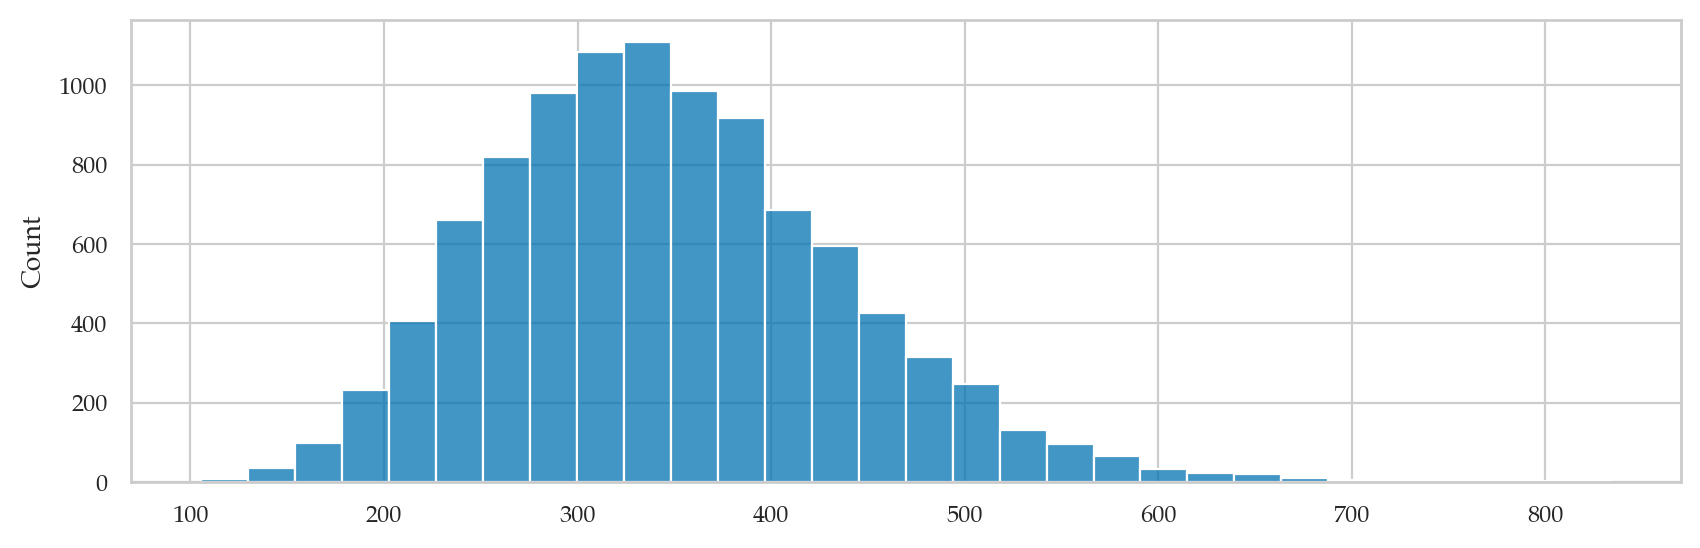

In [56]:
# Parametric boostrap 1: assume normal model for the population
avars_boot = gen_boot_dist(asample, estfunc=var)

n = asample.count()
abar = mean(asample)
astd = std(asample)
rvNS2 = norm(abar, astd)

from stats_helpers import gen_sampling_dist
avars_pboot1 = gen_sampling_dist(rvNS2, estfunc=var, n=n)

sns.histplot(avars_pboot1, bins=30)

[np.percentile(avars_pboot1,5),
 np.percentile(avars_pboot1,95)]

[212.76908831801552, 511.8854254249474]

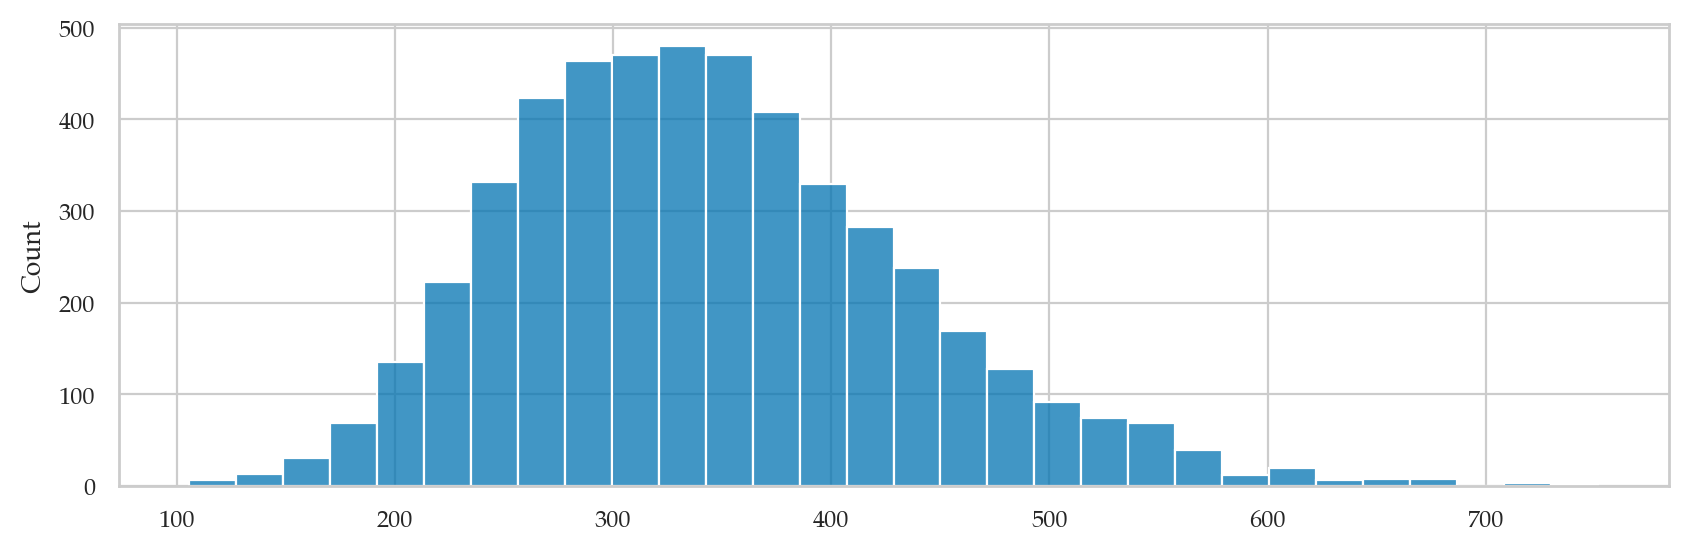

In [57]:
# Parametric boostrap 2: direct modelling of var using scaled chi-square model
# This is a random idea based on Example 4 in cut_material/discovering_estimator_formulas.tex
avars_boot = gen_boot_dist(asample, estfunc=var)

n = asample.count()
df = n-1
scale = var(asample) / (n-1)

from scipy.stats import chi2
rvS2 = chi2(df=df, scale=scale)

from stats_helpers import gen_sampling_dist
avars_pboot2 = rvS2.rvs(5000)

sns.histplot(avars_pboot2, bins=30)

[np.percentile(avars_pboot2,5),
 np.percentile(avars_pboot2,95)]

In [58]:
# Basic bootstrap (a.k.a. reversed)
from scipy.stats import bootstrap

np.random.seed(53)
res = bootstrap((asample,), statistic=var,
                confidence_level=0.9, n_resamples=5000,
                vectorized=False, method="basic")

# sns.histplot(res.bootstrap_distribution, bins=30)

[res.confidence_interval.low,
 res.confidence_interval.high]

[211.122988505747, 495.557011494253]

### var tests

In [ ]:
# ALT1. use the `bootstrap` function from `scipy.stats`
from scipy.stats import bootstrap

np.random.seed(53)
res = bootstrap((asample,), statistic=var,
                confidence_level=0.9, n_resamples=5000,
                vectorized=False, method="percentile")
[res.confidence_interval.low,
 res.confidence_interval.high]

In [46]:
# ALT2. use the `compute_bootci` function from `pingouin`
from pingouin import compute_bootci

compute_bootci(asample, func=var,
               confidence=0.9, n_boot=5000,
               method="per", seed=53)

array([193.13, 487.84])

In [1]:
## Bootstrap difference between means under the hood
# from scipy.stats import bootstrap
# np.random.seed(45)
# res = bootstrap((pricesW, pricesE), statistic=dmeans,
#                 vectorized=False, confidence_level=0.9,
#                 n_resamples=10000, method='percentile')
# [res.confidence_interval.low,
#  res.confidence_interval.high]

### Computing two-sample t-test $p$-values (generic)

CUT in favour of showing details in examples


In [2]:
# FOR TESTING PURPOSES
eprices = pd.read_csv("../datasets/eprices.csv")
pricesW = eprices[eprices["loc"]=="West"]["price"]
pricesE = eprices[eprices["loc"]=="East"]["price"]
xsample, ysample = pricesW, pricesE

NameError: name 'pd' is not defined

In [ ]:
from stats_helpers import calcdf
from scipy.stats import t as tdist

n, m = len(xsample), len(ysample)
xbar, ybar = mean(xsample), mean(ysample)
sx, sy = std(xsample), std(ysample)
obsdhat = dmeans(xsample, ysample)
seD = np.sqrt(sx**2/n + sy**2/m)
df = calcdf(sx,n,sy,m)
rvTDhat0 = tdist(df, loc=0, scale=seD)

pvalue = tailprobs(rvTDhat0, obsdhat, alt="two-sided")
    
pvalue

In [3]:
obst = (obsdhat - 0) / seD
rvT0 = tdist(df, loc=0, scale=1)
pvalue = tailprobs(rvT0, obst, alt="two-sided")
pvalue

NameError: name 'obsdhat' is not defined

#### Pooled variance calculations

In [65]:
varp = ((n-1)*sx**2 + (m-1)*sy**2) / (n+m-2)
stdp = np.sqrt(varp)
seDp = stdp * np.sqrt(1/n + 1/m)

obstp = (obsdhat - 0) / seDp
dfp = n + m - 2
rvT0p = tdist(dfp)
pvalue = tailprobs(rvT0p, obstp, alt="two-sided")
pvalue

0.0001249706798767125

## Combined picture for CASE 1: centred around the population mean

`norm(mu_K, seKhat02)` (centered on true population mean):  this plot describes some hypothetical half-knowledge scenario, where the experimenter knows population mean mu, but doesn't know the variance, so we use CLT or BOOT for the estimated dispersion, but show dist. centered at muK (the population mean).

It's a tricky business... because Picture A is very ugly (reader might feel estimation process is hopeless), but it is real (shows how to calc. CI for population mean).

On the other hand Picture B is nicer to see (yeeey look how nicely the fat tails of the t-distribution fit the histogram of kbars better), but doesn't describe any realistic scenario, or calculation we actually do.


sample mean = 997.9069999999999
 sample var = 124.31760105263136
 sample std = 11.149780314097285


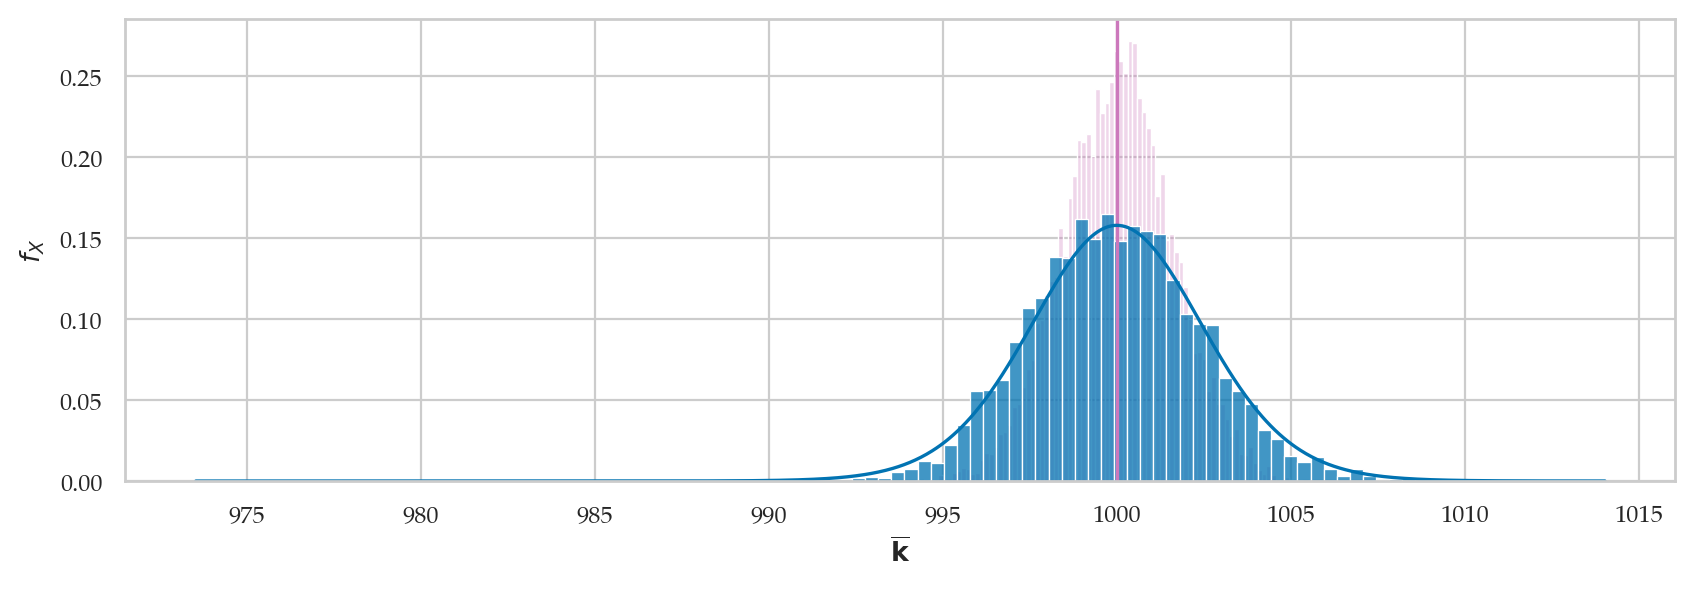

In [4]:
from stats_helpers import gen_sampling_dist, gen_boot_dist
from scipy.stats import norm

muK = 1000
sigmaK = 10
rvK = norm(muK, sigmaK)

fig, ax = plt.subplots()

# true sampling distribution
kbars40 = gen_sampling_dist(rvK, estfunc=mean, n=40)
sns.histplot(kbars40, stat="density", ax=ax, bins=100,
                  label="simulation", alpha=0.3, color="m")

# populatin mean
ax.axvline(rvK.mean(), linestyle="-", color='m')

# particular sample
kombucha = pd.read_csv("../datasets/kombucha.csv")
batch02 = kombucha[kombucha["batch"]==2]
ksample02 = batch02["volume"]
n = ksample02.count()
obsmean02 = mean(ksample02)
obsvar02 = var(ksample02)
print("sample mean =", obsmean02)
print(" sample var =", obsvar02)
print(" sample std =", np.sqrt(obsvar02))

# analytical approximation based on estimated var from `ksample02`
#   we draw the distribution centred around the true population mean
#   to focus on the variance-estimation aspect...
from scipy.stats import t
df = n - 1  # degrees of freedom
seKhat02 = np.sqrt( obsvar02 / n )
rvKbarB = t(df, loc=rvK.mean(), scale=seKhat02)
plot_pdf(rvKbarB, ax=ax, color=blue, label="Student's t approx.")

# boostrap approx
kbars02_boot = gen_boot_dist(ksample02, estfunc=mean)
kbars02_boot = np.array(kbars02_boot)
kbars02_boot_shifted = kbars02_boot - obsmean02 + rvK.mean()
sns.histplot(kbars02_boot_shifted, stat="density", ax=ax, label="boostrap approx.")

# add x-axis label and rm legend
_ = ax.set_xlabel("$\overline{\mathbf{k}}$")
ax.get_legend().remove()

In [5]:
### combined histogram

<AxesSubplot: xlabel='value', ylabel='Density'>

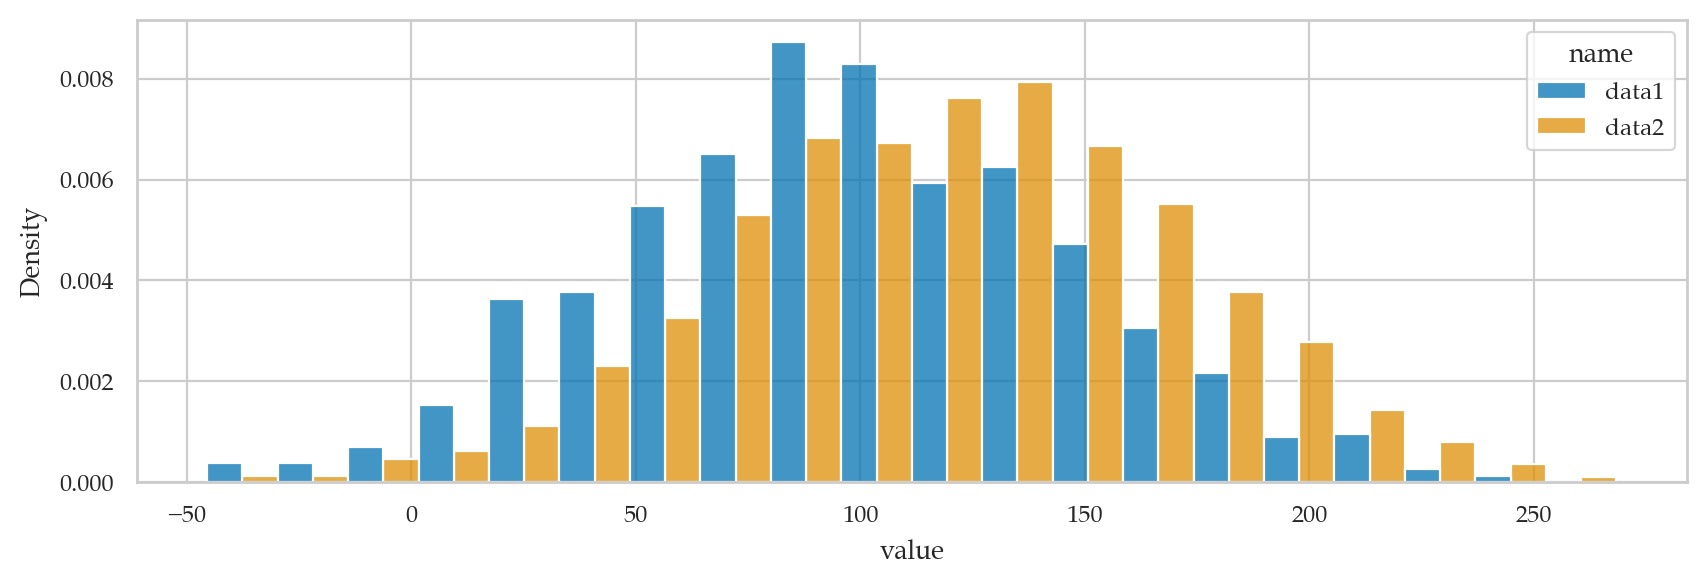

In [6]:
from scipy.stats import norm
data1 = norm(100,50).rvs(1000)
data2 = norm(120,50).rvs(2000)

df = pd.concat(axis=0, ignore_index=True, objs=[
    pd.DataFrame.from_dict({'value': data1, 'name': 'data1'}),
    pd.DataFrame.from_dict({'value': data2, 'name': 'data2'})
])
fig, ax = plt.subplots()
sns.histplot(data=df, bins=20, stat="density", common_norm=False, x='value',
             hue='name', multiple='dodge',ax=ax)

#### Bootstrapped sampling distribution of the sample median (optional)

<AxesSubplot: ylabel='Count'>

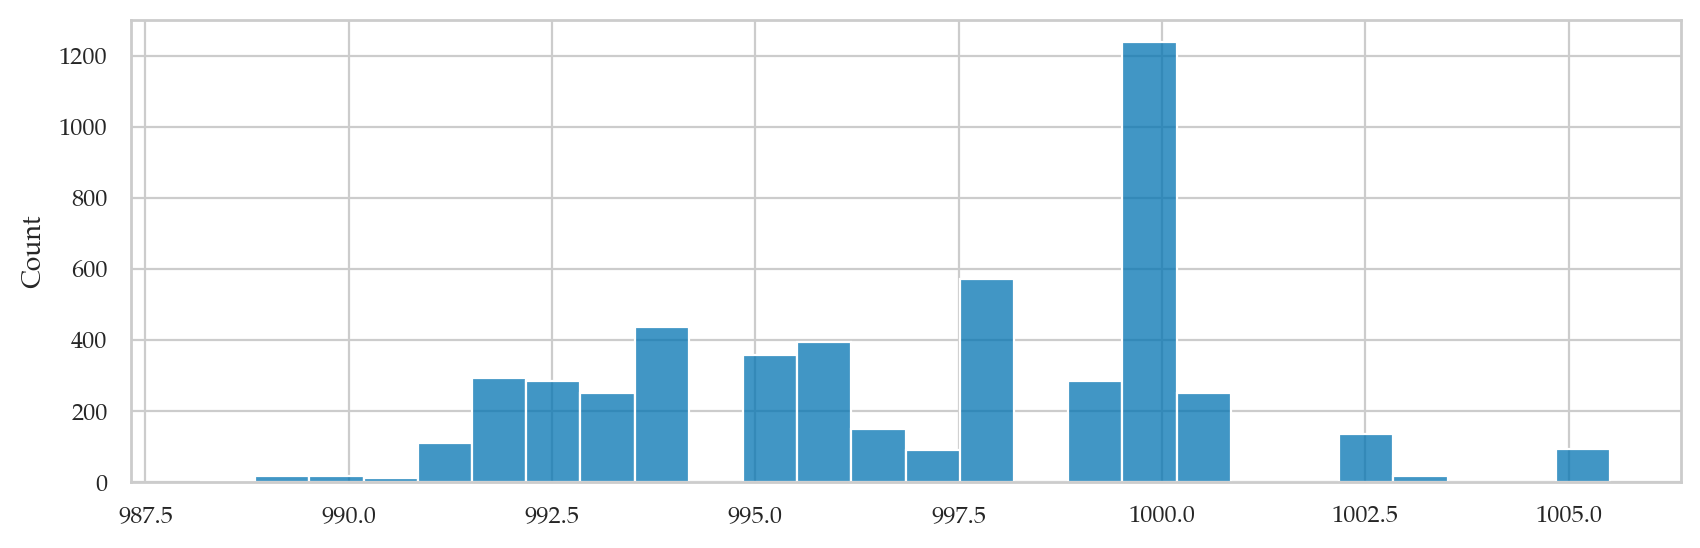

In [7]:
# np.random.seed(49)
kmedians_boot = gen_boot_dist(ksample02, estfunc=np.median)
sns.histplot(kmedians_boot)

In [8]:
np.mean(kmedians_boot), np.std(kmedians_boot)

(996.980743, 3.3038099813625883)

In [9]:
kmedians_boot = gen_boot_dist(ksample02, estfunc=np.median)
CI_median_boot = [np.percentile(kmedians_boot,5),
                  np.percentile(kmedians_boot,95)]
CI_median_boot

[991.58, 1000.42]

In [10]:
# true
kmedians = gen_sampling_dist(rvK, estfunc=np.median, n=20)
[np.percentile(kmedians,5),
 np.percentile(kmedians,95)]

[995.5339175170992, 1004.5206798298357]

## Bonus estimators (median an percentile)

##### Sampling distribution of sample median (optional)

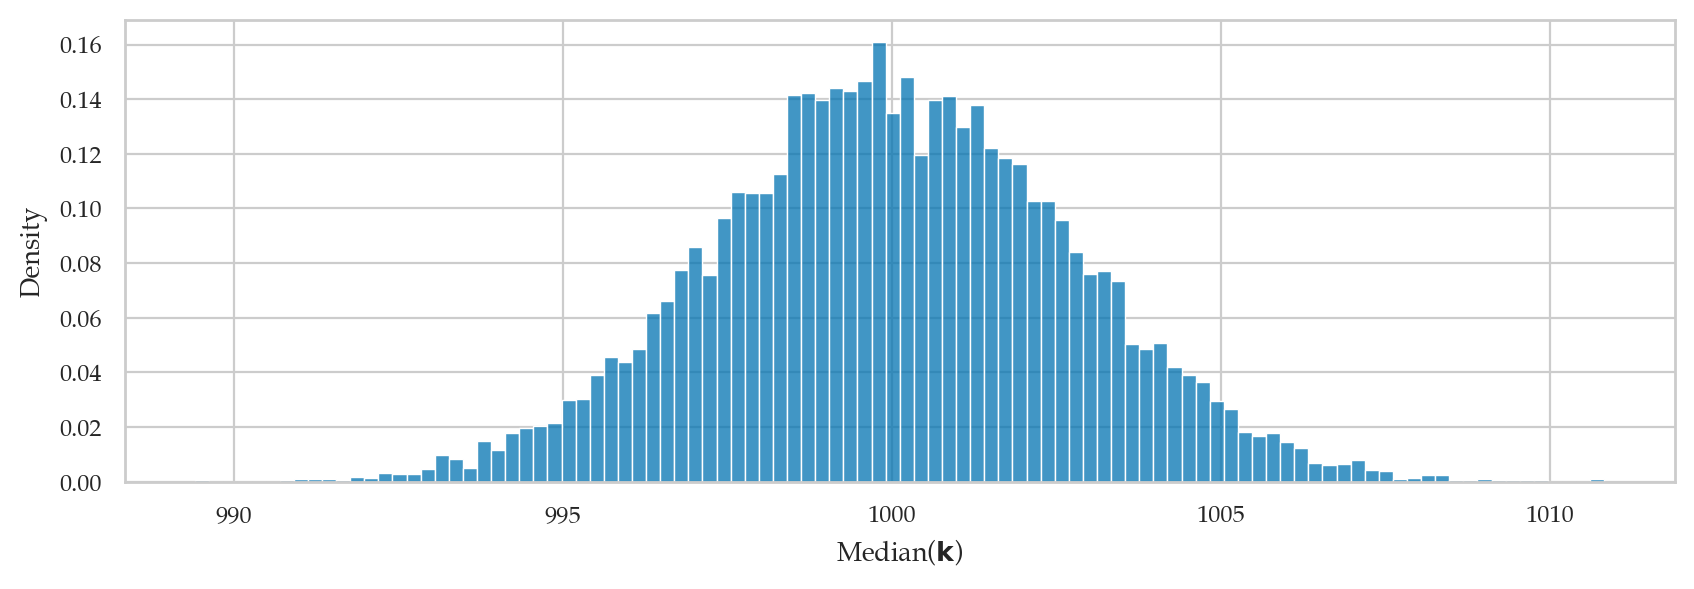

In [11]:
np.random.seed(44)
kmedians = gen_sampling_dist(rvK, estfunc=np.median, n=20)
ax = sns.histplot(kmedians, stat="density", bins=100)
ax.set_xlabel("Median(${\mathbf{k}}$)");

##### Sampling distribution of 90th percentile (optional)

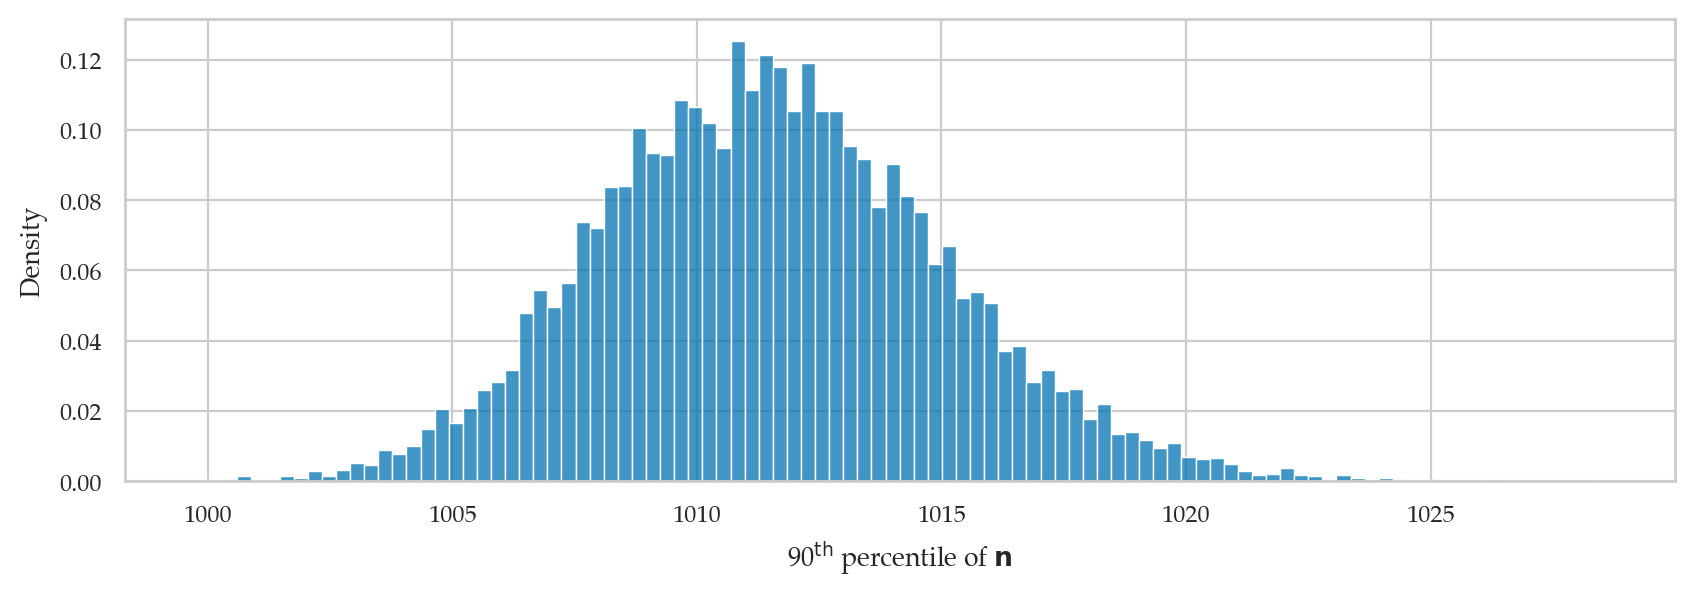

In [12]:
def ninetypctile(sample):
    return np.percentile(sample, 90)
ninetypctiles = gen_sampling_dist(rvK, estfunc=ninetypctile, n=20)
ax = sns.histplot(ninetypctiles, stat="density", bins=100)
_ = ax.set_xlabel("90$^\mathrm{th}$ percentile of ${\mathbf{n}}$")

# Example diff betweeen known Normals

In [13]:
# example parameters for each group
muA, sigmaA = 300, 10
muB, sigmaB = 200, 20

# size of samples for each group
nA = 5
nB = 4

#### Particular value of the estimator `dmeans`

In [14]:
xA = norm(muA, sigmaA).rvs(nA)  # random sample from Group A
xB = norm(muB, sigmaB).rvs(nB)  # random sample from Group B

d = dmeans(xA, xB)
d

89.77581641278658

The value of $\hat{d}$ computed from the samples is an estimate for the difference between means of two groups: $\Delta =  \mu_A - \mu_{B}$ (which we know is $100$ in this example).

In [15]:
# MAYBE USE IN EXERCISE
def gen_sampling_dist2(rvA, rvB, estfunc, nA, nB, N=1000):
    stats = []
    for i in range(0, N):
        xA = rvA.rvs(nA)
        xB = rvB.rvs(nB)
        stat = estfunc(xA, xB)
        stats.append(stat)
    return stats

In [16]:
def get_sampling_dist(estfunc, meanA, stdA, nA, meanB, stdB, nB, N=1000):
    """
    Obtain the sampling distribution of the statistic `estfunc`
    from `N` random samples drawn from groups A and B with parmeters:
      - Group A: `nA` values taken from `norm(meanA, stdA)`
      - Group B: `nB` values taken from `norm(meanB, stdB)`
    """
    stats = [] 
    for i in range(0, N):
        xA = norm(meanA, stdA).rvs(nA)  # random sample from Group A
        xB = norm(meanB, stdB).rvs(nB)  # random sample from Group B
        stat = estfunc(xA, xB)         # evaluate `estfunc`
        stats.append(stat)      # record the value of estfunc
    return stats

In [17]:
# Generate the sampling distirbution for dmeans
dmeans_sdist = get_sampling_dist(estfunc=dmeans,
                                 meanA=muA, stdA=sigmaA, nA=nA,
                                 meanB=muB, stdB=sigmaB, nB=nB)

print("Generated", len(dmeans_sdist), "values from `dmeans(XA, XB)`")

Generated 1000 values from `dmeans(XA, XB)`


In [18]:
# first 3 values
dmeans_sdist[0:3]

[94.85969872626583, 90.96751735263982, 93.14855520396037]

#### Plot the sampling distribution of `dmeans`

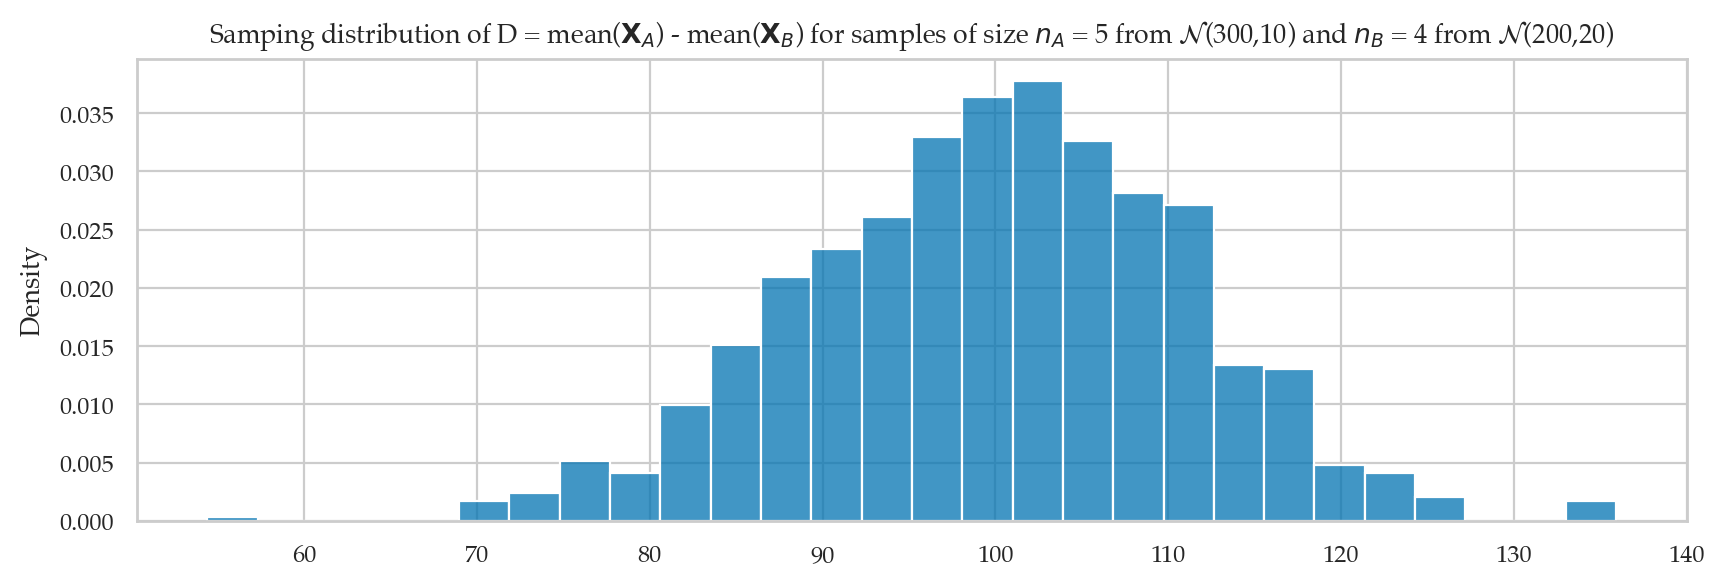

In [19]:
ax3 = sns.histplot(dmeans_sdist, stat="density")
title3 = "Samping distribution of D = mean($\mathbf{X}_A$) - mean($\mathbf{X}_B$) " + \
         "for samples of size $n_A$ = " + str(nA) + \
         " from $\mathcal{N}$(" + str(muA) + "," + str(sigmaA) + ")" + \
         " and $n_B$ = " + str(nB) + \
         " from $\mathcal{N}$(" + str(muB) + "," + str(sigmaB) + ")"
_ = ax3.set_title(title3)

#### Example 4: exponentially distributed population with known parameter

In [20]:
# from scipy.stats import expon
# lam = 0.2
# rvE = expon(0,1/lam)
# plot_pdf(rvE)

In [21]:
def plot_errorbars(arg, **kws):
    np.random.seed(sum(map(ord, "error_bars")))
    x = np.random.normal(0, 1, 100)
    f, axs = plt.subplots(2, figsize=(7, 2), sharex=True, layout="tight")
    sns.pointplot(x=x, errorbar=arg, **kws, capsize=.3, ax=axs[0])
    sns.stripplot(x=x, jitter=.3, ax=axs[1])

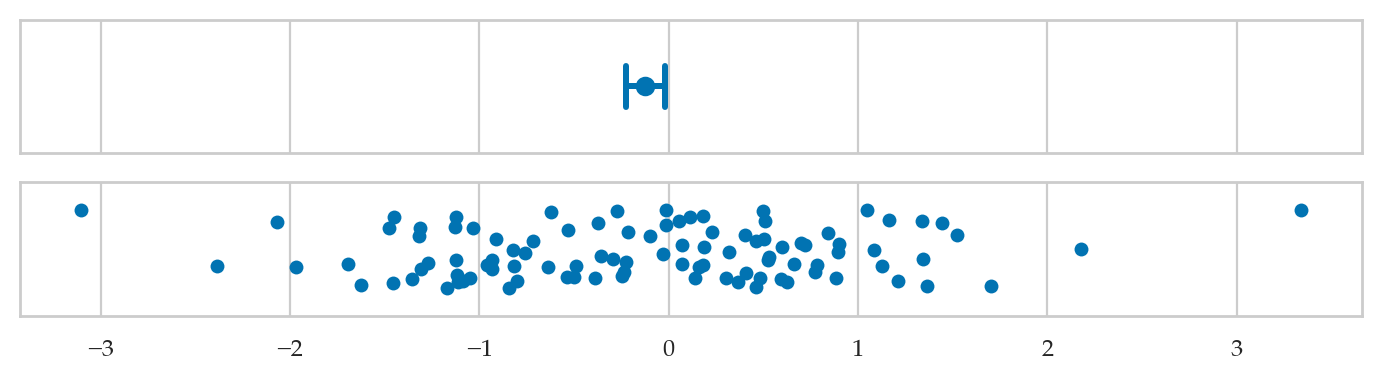

In [22]:
plot_errorbars("se", estimator="mean")

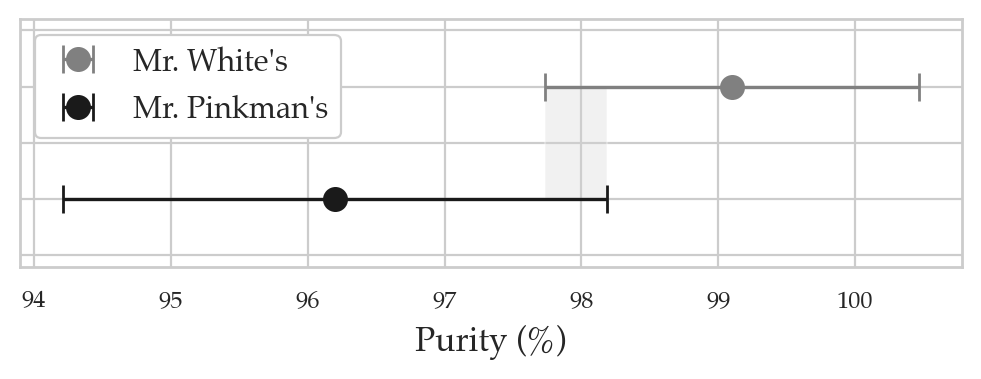

In [23]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

conf_pinkman = stats.t.interval(1 - 0.05, 18 - 1, loc=96.2, scale= 4 / np.sqrt(18))
conf_white = stats.t.interval(1 - 0.05, 21 - 1, loc=99.1, scale= 3 / np.sqrt(21))

# plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(5, 2))

ax.errorbar(99.1, 1, xerr=(conf_white[1] - conf_white[0]) / 2,
            fmt='o', markersize=8, capsize=5, label='Mr. White\'s', color='grey')
ax.errorbar(96.2, 0, xerr=(conf_pinkman[1] - conf_pinkman[0]) / 2,
            fmt='o', markersize=8, capsize=5, label='Mr. Pinkman\'s', color='k')
ax.set_ylim(-0.6, 1.6)
ax.fill_betweenx([1, 0], conf_white[0], conf_pinkman[1], facecolor='lightgrey', alpha=0.3)
ax.legend(loc='best', fontsize=11, framealpha=1, frameon=True)
ax.set_xlabel('Purity (%)', fontsize=12)
ax.yaxis.set_major_formatter(plt.NullFormatter())
fig.tight_layout();

#### Example 2: generating observations from the geometric distribution

Suppose we want to generate random observations
from the geometrically distributed random variable $G \sim \textrm{Geom}(p=0.2)$,
which corresponds to the waiting time until first success
in repeated sequence of Bernoulli trials,
where each trials has probability $p=0.2$ of success.

The function `gen_g` defined below is a generator of observations from the random variable $G$.

In [24]:
import random
from scipy.stats import geom

rvG = geom(p=0.2)

def gen_g(p):
    u = random.random()
    for k in range(1, 100):
        if u <= rvG.cdf(k):
            return k


To generate a random observation from $B \sim \textrm{Bernoulli}(p=0.3)$,
we simply need to call the function `gen_b` with the keyword argument `p=0.3`.

In [25]:
gen_g(p=0.2)

1

Let's now generates `n=1000` observations from $G \sim \textrm{Geom}(p=0.2)$.

<AxesSubplot: ylabel='Count'>

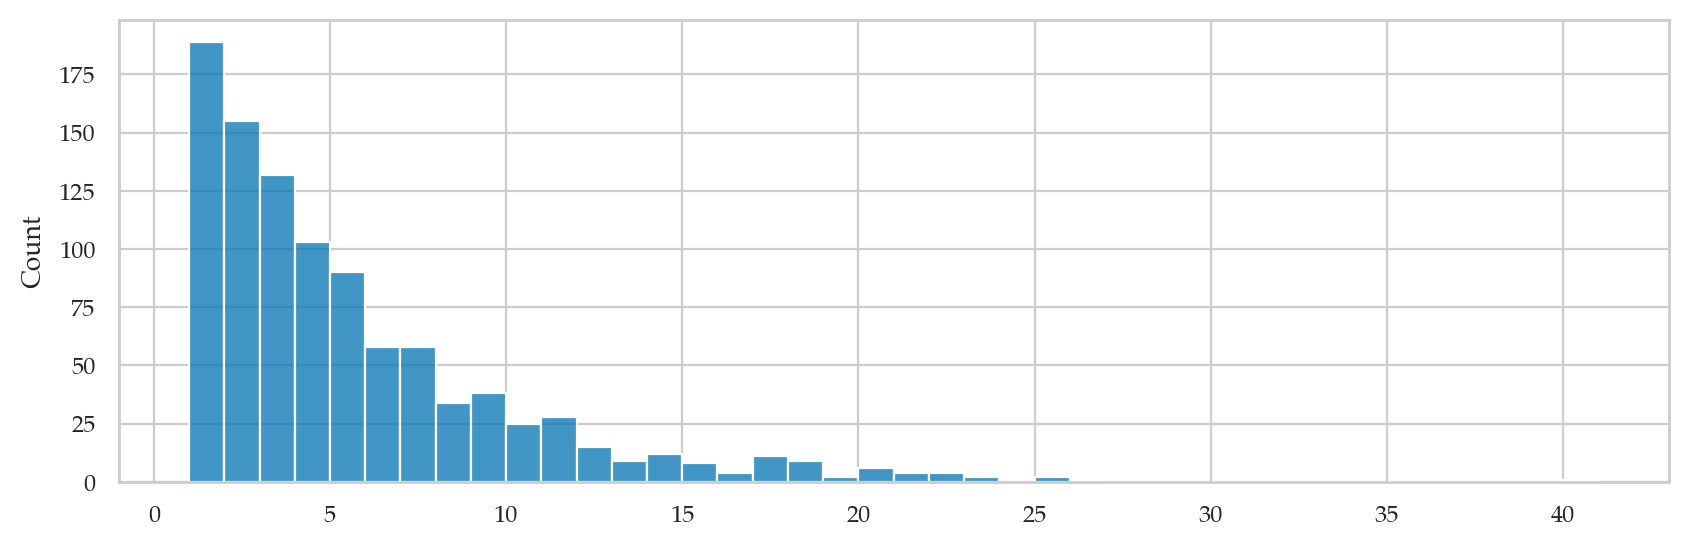

In [26]:
n = 1000
gsample = [gen_g(p=0.2) for i in range(0,n)]

sns.histplot(gsample)

#### Annotations on plot

Text(0.1, 0.5, 'Saturday\nMean')

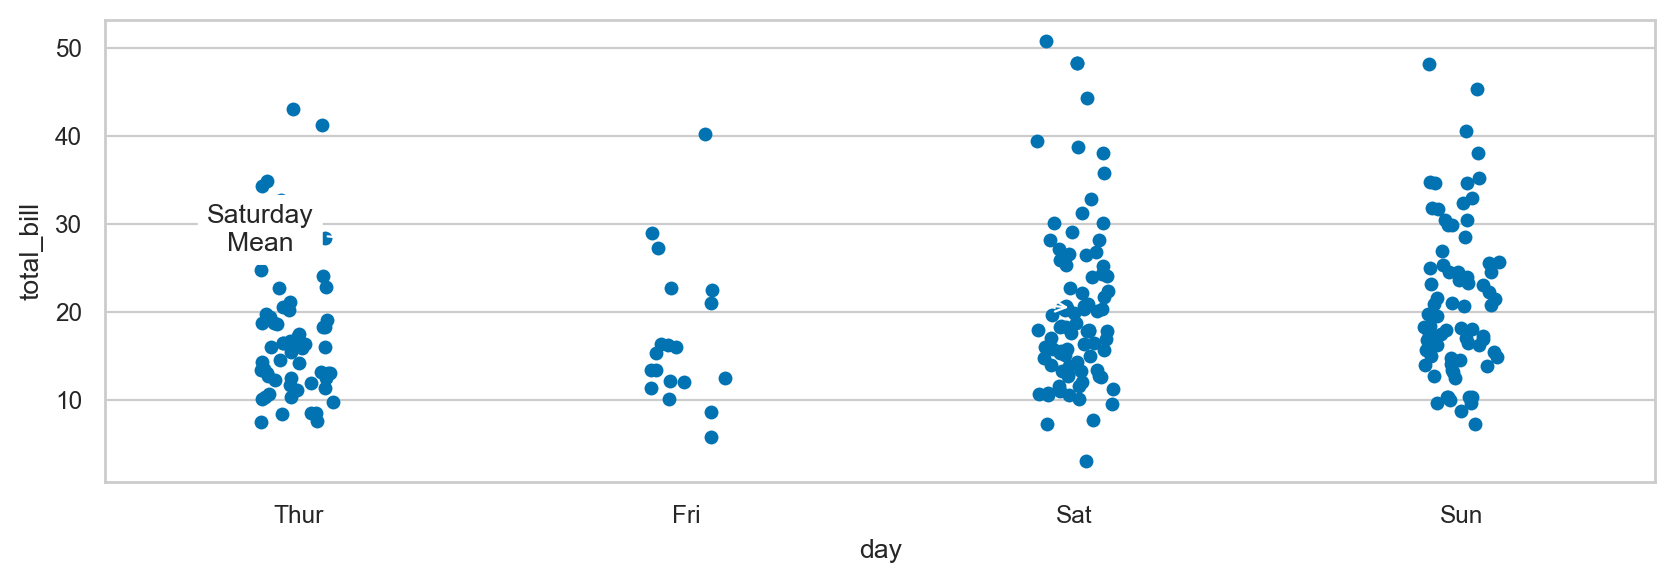

In [27]:
import seaborn as sns

sns.set_style("whitegrid")
tips = sns.load_dataset("tips")
sat_mean = tips.loc[tips['day'] == 'Sat']['total_bill'].mean()

ax = sns.stripplot(x="day", y="total_bill", data=tips)
ax.annotate("Saturday\nMean",
            xy=(2, sat_mean), xycoords='data',
            xytext=(.1, .5), textcoords='axes fraction',
            horizontalalignment="center",
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            bbox=dict(boxstyle="round", fc="w"),
            )

### Example 1: Samples from a uniform distribution


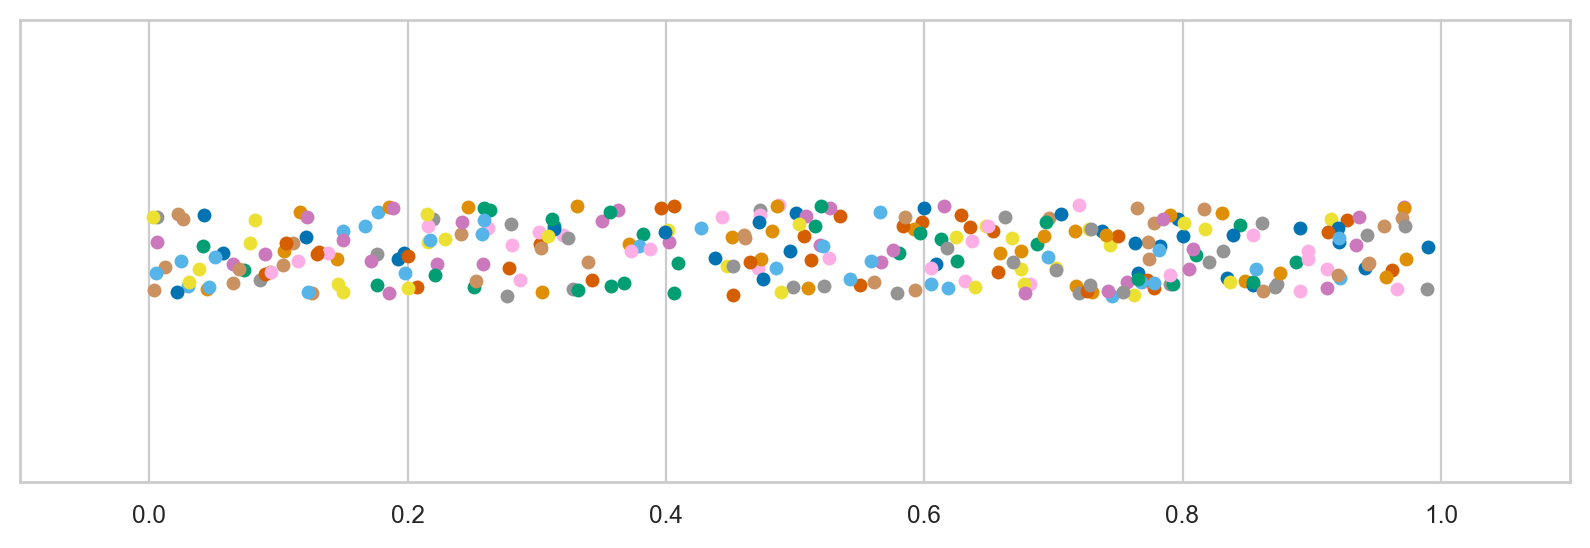

In [28]:
from scipy.stats import uniform

# define a uniform random variable
rv1 = uniform(0, 1)
mu1 = rv1.mean()    # 𝜇1 (mu)
sigma1 = rv1.std()  # 𝜎1 (sigma)

# plot data from 30 samples of size 10
N = 30
n = 10
plt.xlim(-0.1, 1.1)
for i in range(0, N):
    sample1 = rv1.rvs(n)
    sns.stripplot(x=sample1)

#### Sampling distribution of the mean

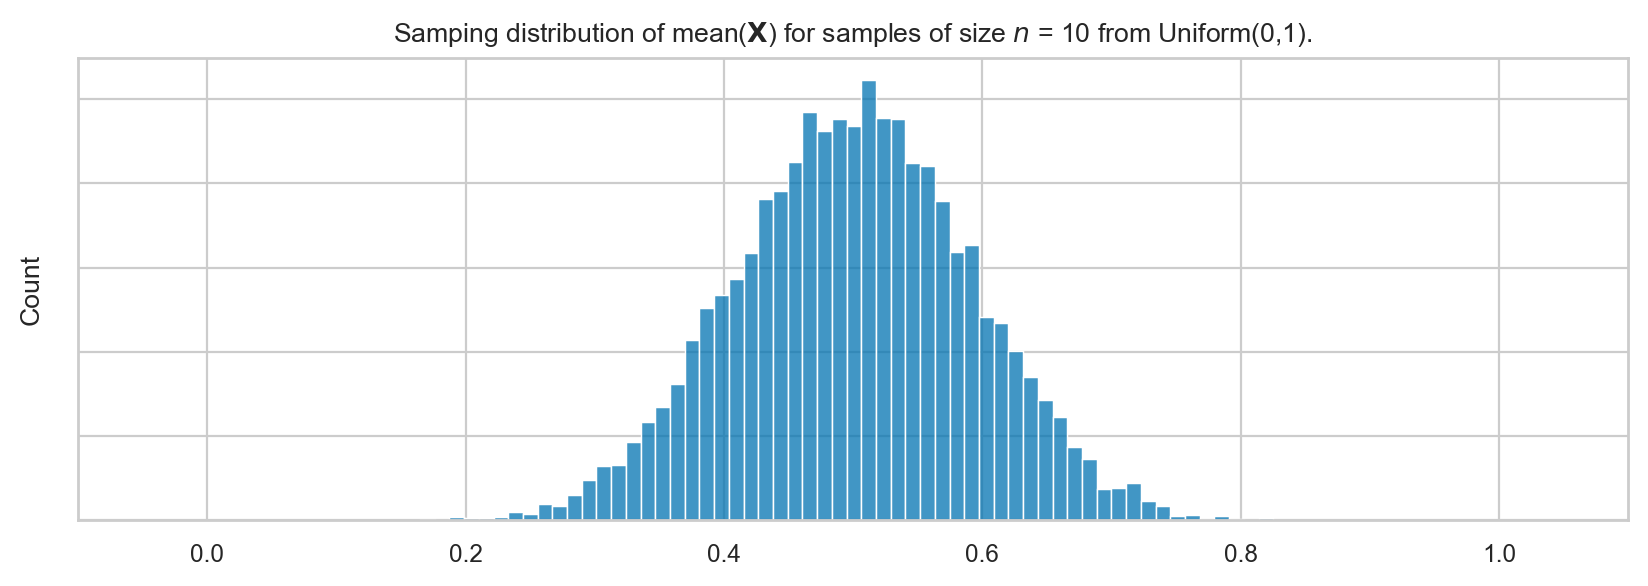

In [29]:
from stats_helpers import gen_sampling_dist
# compute the sampling distribution for samples of size n
mean_sdist_data1 = gen_sampling_dist(rv1, mean, n, N=10000)

# plot a histogram of the sampling distribution
plt.xlim(-0.1, 1.1)
ax = sns.histplot(mean_sdist_data1, kde=False)
# stat="density"
ax.set(yticklabels=[])
_ = ax.set_title("Samping distribution of mean($\mathbf{X}$) for samples "
                 "of size $n$ = " + str(n) + ' from Uniform(0,1).')

In [30]:
xbar_mu = np.mean(mean_sdist_data1)
xbar_std = np.std(mean_sdist_data1, ddof=1)
print("The sampling distribution has mean", round(xbar_mu,2),
      "\nand the standard error is", round(xbar_std,5))

The sampling distribution has mean 0.5 
and the standard error is 0.09149


In [31]:
# CLT prediction about standard error: 
sigma1/np.sqrt(n)

0.09128709291752768

### Example 2: Samples from a normal distribution

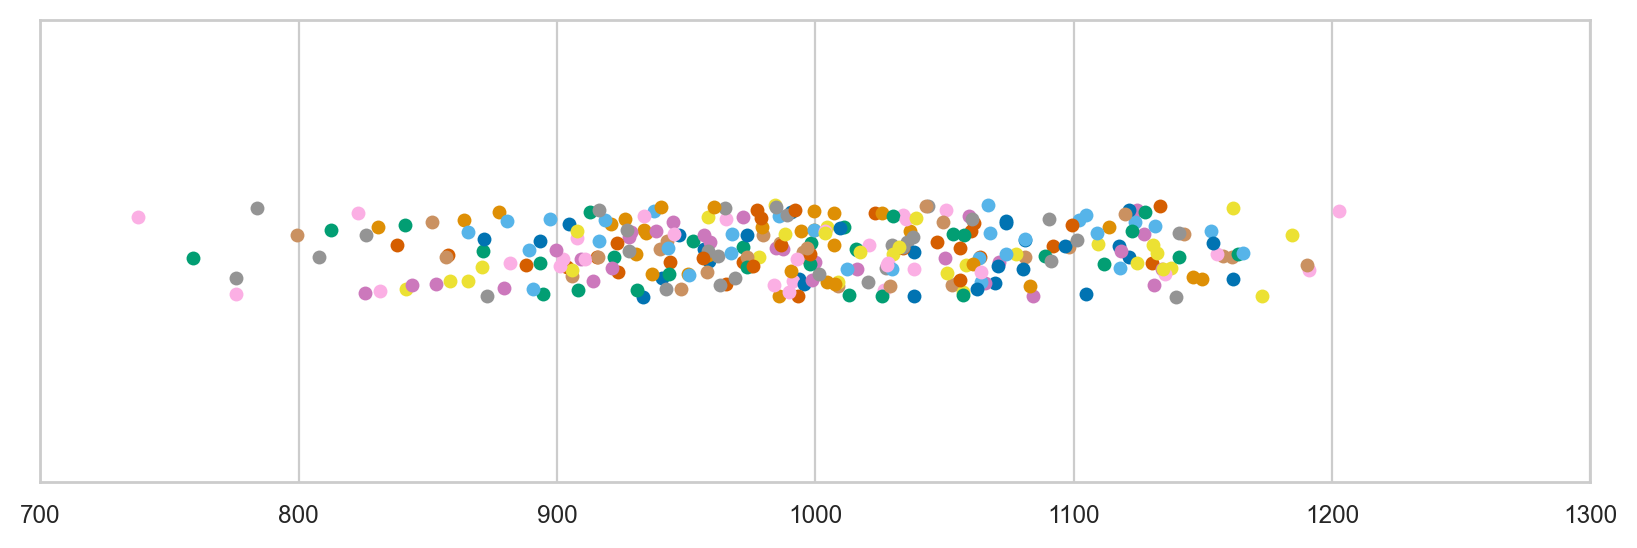

In [32]:
from scipy.stats import norm

# define a normal random variable
mu2 = 1000         # 𝜇2 (mu)
sigma2 = 100       # 𝜎2 (sigma)
rv2 = norm(mu2, sigma2)

# plot data from 30 samples of size 10
N = 30
n = 10
plt.xlim(700,1300)
for i in range(0, N):
    sample2 = rv2.rvs(n)
    sns.stripplot(x=sample2)

#### Sampling distribution of the mean

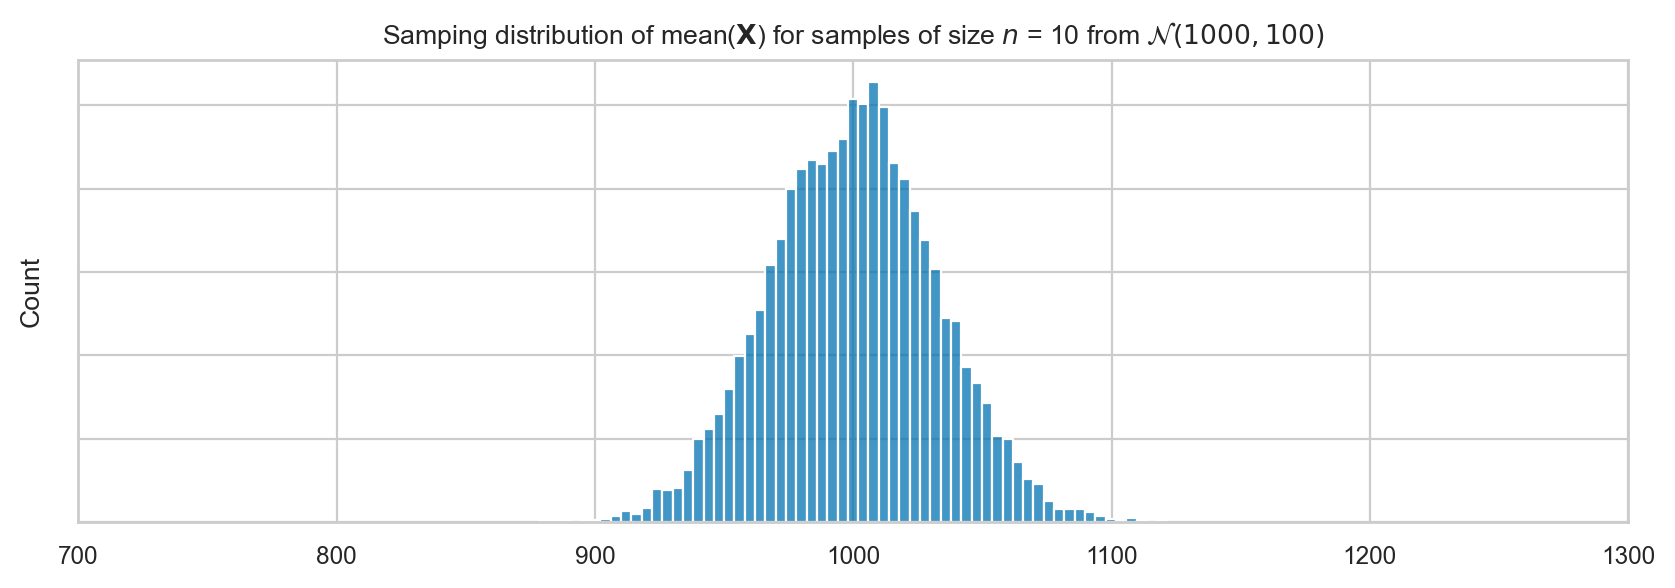

In [33]:
# compute the sampling distribution for samples of size n
mean_sdist_data2 = gen_sampling_dist(rv2, mean, n, N=10000)

# plot a histogram of the sampling distribution
ax = sns.histplot(mean_sdist_data2, kde=False)
ax.set(yticklabels=[])
plt.xlim(700,1300)
_ = ax.set_title("Samping distribution of mean($\mathbf{X}$) for samples of size "
                 "$n$ = " + str(n) + ' from $\mathcal{N}('+ str(mu2) + ',' + str(sigma2) + ')$')

In [34]:
xbar_mu = np.mean(mean_sdist_data2)
xbar_std = np.std(mean_sdist_data2, ddof=1)
print("The sampling distribution has mean", round(xbar_mu,2),
      "\nand the standard error is", round(xbar_std,2))

The sampling distribution has mean 1000.33 
and the standard error is 31.92


In [35]:
# CLT prediction about standard error:
sigma2/np.sqrt(n)

31.622776601683793

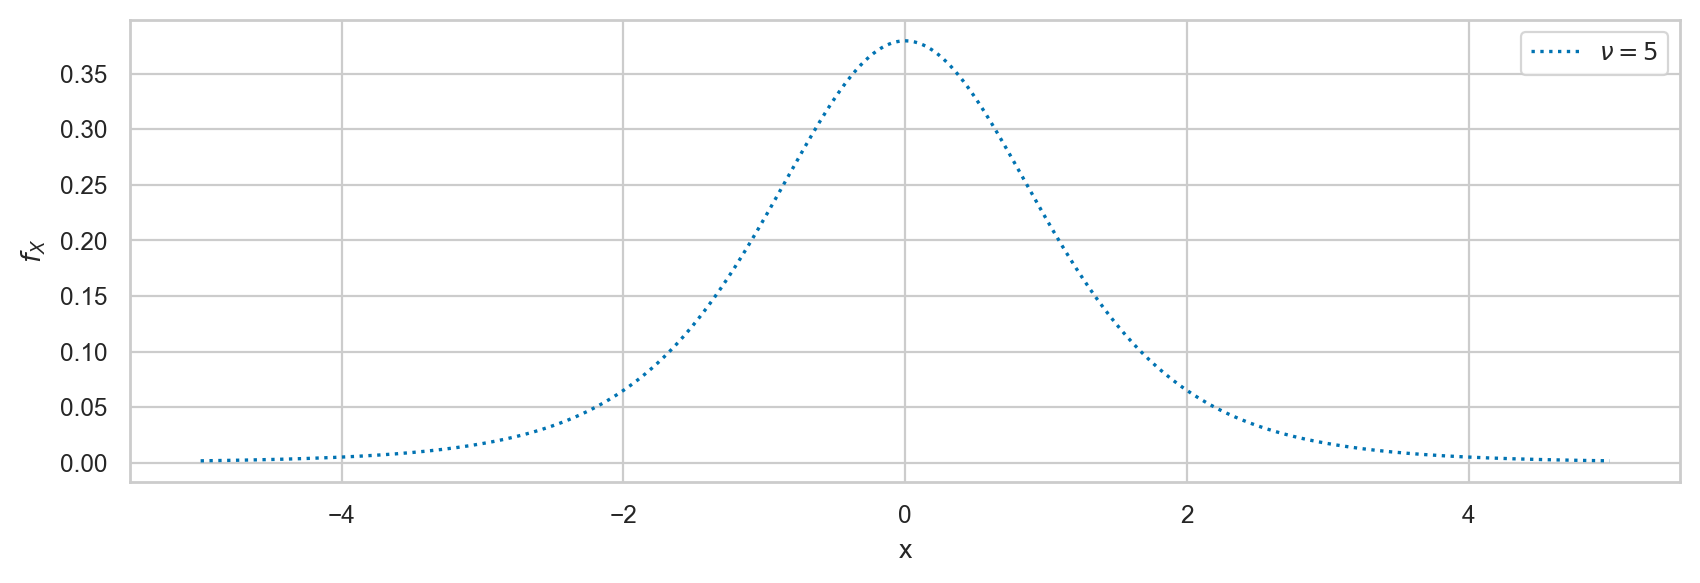

In [36]:
from scipy.stats import t


fig, ax = plt.subplots()
# for df in [2,5,10,100]:
df = 5
rvT = t(df)

xmin, xmax = [-5,5]
xs = np.linspace(xmin, xmax, 1000)
fXs = rvT.pdf(xs)
# sns.lineplot(x=xs, y=fXs, ax=ax, linestyle='--', label="lkj")
ax = plot_pdf(rvT, xlims=[-5,5], ax=ax, label="$\\nu={}$".format(df), linestyle=":")


Text(0.5, 1.0, 'Default negative contours')

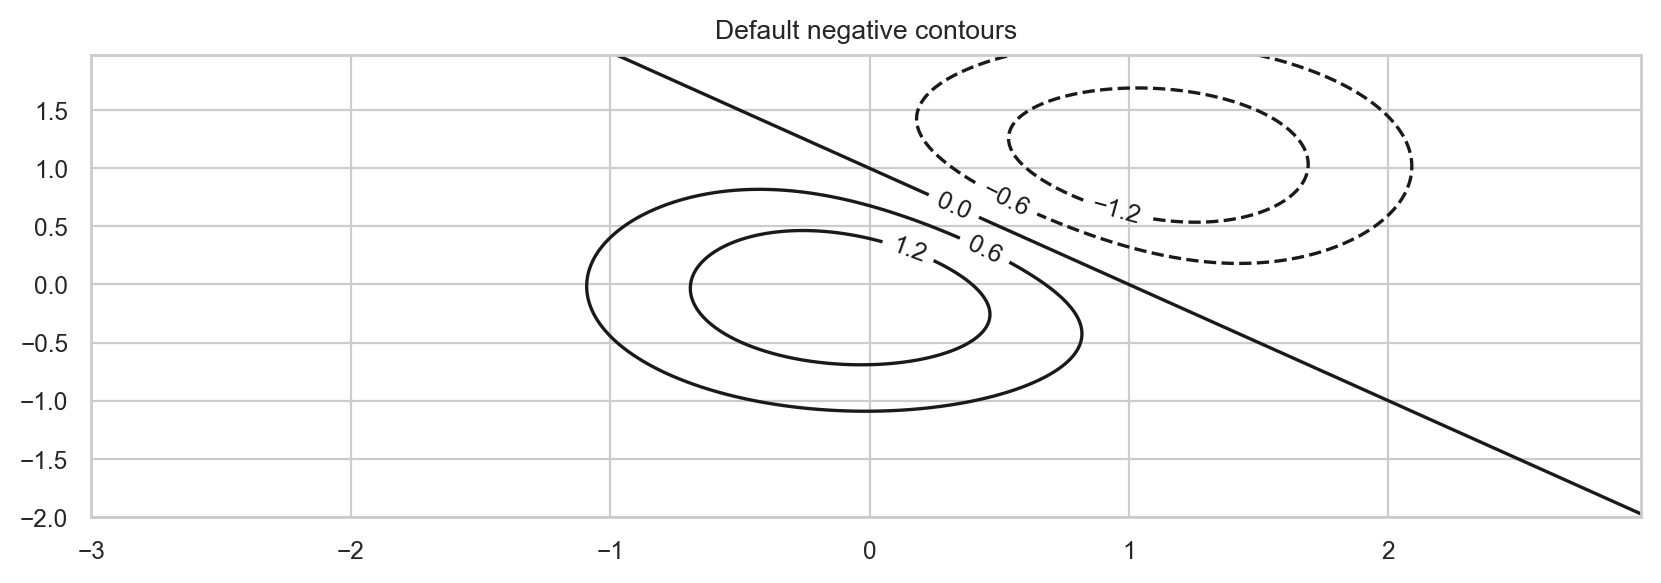

In [37]:
delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

fig, ax = plt.subplots(1, 1)

CS = ax.contour(X, Y, Z, 6, colors='k')
ax.clabel(CS, fontsize=9, inline=True)
ax.set_title('Default negative contours')

In [38]:
# # stats
# mean, var, skew, kurt = rvF.stats(moments='mvsk')
# mean, var, skew, kurt


### Why do we need probability theory in statistics?

Probability theory provides us with some essential tools needed for statistics:
  - modelling: describe a population as a probability distribution
  - sampling distributions: distributions obtained for random samples from a population

Additionally, artificially introduced randomness is the basis for two of the most important statistics "kung fu" techniques:

- **random selection** = if you collect a sample of size n randomly selected from a population, then compute statistics from the sample, you can then make inferences about the whole population.
- **random assignment** = create two roughly equivalent groups by randomly assigning participants into group A or group B. This random split is the basis for a statistical experiment that compares an intervention group and a control group. Given the participants were randomly assigned to the two groups, we can hope they are roughly equally distributed on all dimensions (similar distribution of all confounding variables), so that any differences observed between groups can be attributed to the intervention. Calculating the difference statistic intervention-control give an estimate of the effect size of this intervention.

# CUT MATERIAL from 21_prob_theory.ipynb

### Computing prob integrals using quad

#### Uniform

In [39]:
def fU(u):
    if 0 <= u and u <= 1:
        return 1.0
    else:
        return 0.0

In [40]:
from scipy.integrate import quad
quad(fU, -10, 10)[0]

0.9999999999999999

In [41]:
quad(fU, 0.2, 0.5)[0]

0.3

#### Normal

In [42]:
mu = 1000
sigma = 100

def fN(n):
    z = (n - mu)/sigma
    C = sigma * np.sqrt(2*np.pi)
    return 1 / C * np.exp(-1/2 * z**2)

In [43]:
quad(fN, 0, 2000)[0]

1.0000000000000002

We're using limits of integration 0 and 2000 because that function is practically zero outside this range, and function `quad` [needs](https://stackoverflow.com/questions/63673369/while-using-scipy-integrate-quad-increasing-bound-of-a-positive-function-decrea) finite limits of integration to work properly.

In [44]:
quad(fN, 800, 900)[0]

0.13590512198327784

### Computing prob integrals using trapz

In [45]:
from scipy.integrate import trapz

In [46]:
m = 1000
ns = np.linspace(800, 900, m)
fNs = fN(ns)

trapz(fNs, ns)

0.1359051331713763

In [47]:
# how different 
quad(fN, 800, 900)[0] - trapz(fNs, ns)

-1.118809847544533e-08

## Using prob models

In [48]:
# uniform distribution U(0,1)
from sympy import symbols, integrate, Integral, simplify
x, a, b = symbols('x a b')
fU = 1

simplify( integrate(fU, (x,a,b)) )

-a + b

In [49]:
Integral(fU, x)

Integral(1, x)

In [50]:
Integral(fU, x).doit()

x

## Random process examples using Python (bonus material)

Let's look at some simple examples of two random events: a coin flip and a die roll.
We'll use the Python module `random` to generate random numbers.

In [51]:
import random

random.random() # random number between 0 (inclusive) and 1 (non-inclusive)

0.43978308942595656

### Coin flip example

The code example below shows a function that performs the equivalent of a coin flip.

In [52]:
def flip_coin():
    r = random.random()  # a number in the range [0,1)
    if r < 0.5:
        return "heads"
    else:
        return "tails"

flip_coin()

'tails'

#### Flipping a coin many times

Let's see what happens if we flip the coin many times.

heads     990
tails    1010
dtype: int64


<AxesSubplot: >

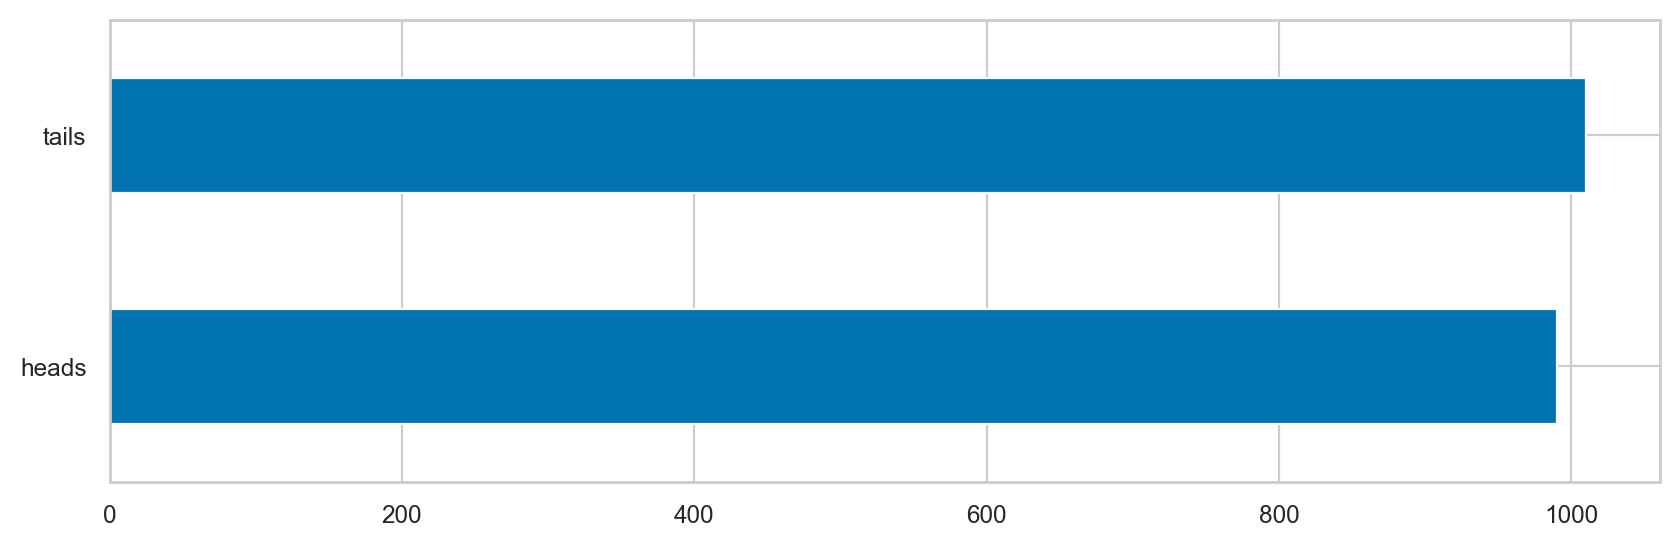

In [53]:
flips = [flip_coin() for _ in range(0, 2000)]
heads = [flip for flip in flips if flip == "heads"]

len(heads)/len(flips)

# plot a horizontal bar chart of the number of outcomes
s = pd.Series(flips)
print(s.value_counts().sort_index())
s.value_counts().sort_index().plot(kind="barh")

### Six-sided die example

In [54]:
def roll_die():
    r = random.random()*6  # a number in the range [0,6)
    rint = int(r)          # convert to integer in {0,1,2,3,4,5}
    value = rint + 1       # convert to integer in {1,2,3,4,5,6}
    return value

roll_die()

2

Let's see what happens if we roll the die many times.

1    1019
2     964
3    1007
4    1050
5     982
6     978
dtype: int64


<AxesSubplot: >

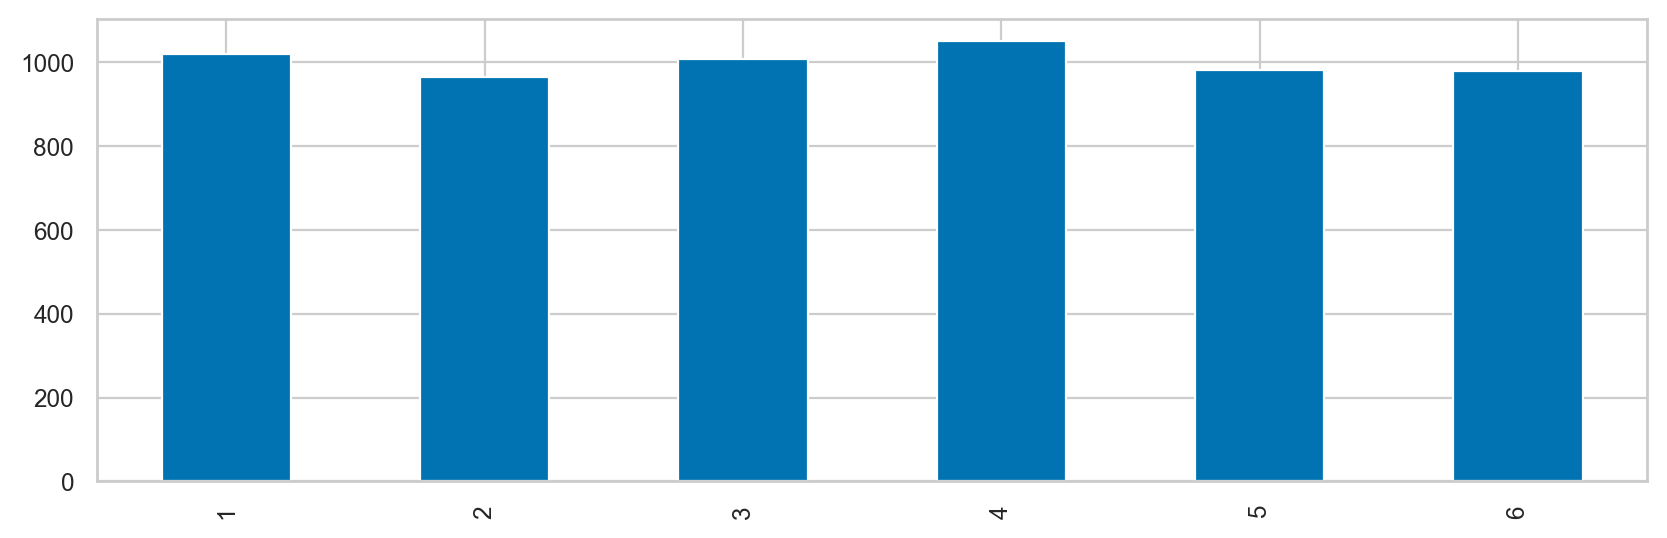

In [55]:

rolls = [roll_die() for _ in range(0, 6000)]
ds = pd.Series(rolls)
print(ds.value_counts().sort_index())
ds.value_counts().sort_index().plot(kind="bar")

#### Example 3: Coin flip

Consider the random variable $C$ that describes the outcome of a coin flip for a balanced (fair) coin.
The sample space for the random variable $C$ is $\{\texttt{heads}, \texttt{tails}\}$.

The probability mass function is
$$
    f_C(\texttt{heads}) = 0.5
    \quad
    \textrm{and}
    \quad
    f_C(\texttt{tails}) = 0.5.
$$

In [56]:
# define the computer model `rvC` for the random variable C
from scipy.stats import randint
rvC = randint(0, 2)

# print the values of the probability mass function
for c in range(0,2):
    print(c, rvC.pmf(c))

0 0.5
1 0.5


#### Example 4: Rolling a six-sided die

The random outcome that occurs when we roll a six-sided die can be described as a random variable $D$
which has the sample space $\{1, 2, 3, 4, 5, 6\}$.
If we assume the die is fair,
then each of the outcomes will have equal weight,
so the probability mass function $f_D$ has the following values:

$$
    f_D(1)\!=\!\tfrac{1}{6},
    \ 
    f_D(2)\!=\!\tfrac{1}{6},
    \ 
    f_D(3)\!=\!\tfrac{1}{6},
    \ 
    f_D(4)\!=\!\tfrac{1}{6},
    \ 
    f_D(5)\!=\!\tfrac{1}{6},
    \ 
    f_D(6)\!=\!\tfrac{1}{6}.
$$

In [57]:
# define the computer model `rvD` for the random variable D
rvD = randint(1, 7)

# print the values of probability mass function
for d in range(1,7):
    print(d, rvD.pmf(d))

1 0.16666666666666666
2 0.16666666666666666
3 0.16666666666666666
4 0.16666666666666666
5 0.16666666666666666
6 0.16666666666666666


#### Intentionally skipped

In [58]:
rvN = norm(1000,10)
rvN.moment(1)  # = rvN.mean()

1000.0

In [59]:
# Let's verify the formula:
# E[(x-𝜇)^2]  = E[X^2]         -   E[X]^2
#               second moment      first moment squared
rvN.var()    == rvN.moment(2)  -   rvN.moment(1)**2

True

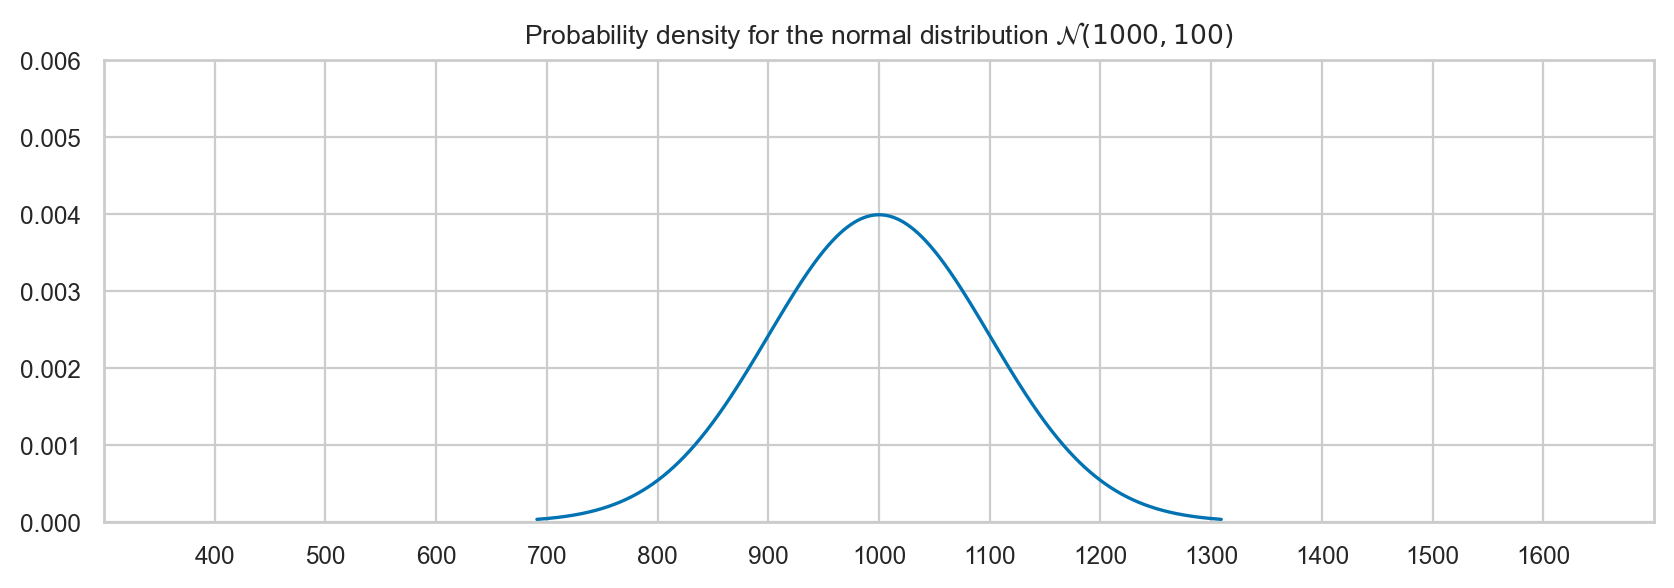

In [60]:
from scipy.stats import norm

# 1. choose the parameters:
mean = 1000   # 𝜇 (mu)    = where is its center?
std = 100     # 𝜎 (sigma) = how spread out is it?

# 2. create a normal random variable
rvN = norm(mean, std)

# 3. plot it's probability density function (pdf)
x = np.linspace(rvN.ppf(0.001), rvN.ppf(0.999), 10000)
y = rvN.pdf(x)
ax = sns.lineplot(x=x, y=y)
title = 'Probability density for the normal distribution $\mathcal{N}('+ str(mean) + ',' + str(std) + ')$'
ax.set_title(title)
ax.set_xlim(300,1700)
plt.xticks(np.arange(400,1700,100))
_ = ax.set_ylim(0, 0.006)

In [61]:
rvN.entropy()

6.024108719192764

In [62]:
0.5*np.log(2*np.pi*sigma**2) + 0.5

6.024108719192764

#### EARLY ATTEMPTS AT EXPECTATIONS CALCULATIONS

In [63]:
from sympy import Rational, symbols
u = symbols('u')
integrate( (u-Rational(1,2))**2, (u,0,1) )

1/12

In [64]:
from scipy.stats import uniform

xs = np.linspace(0, 1, 1000)
rvU = uniform(0, 1)

In [65]:
from scipy.integrate import trapz

# mean
y1 = xs*rvU.pdf(xs)
mu = trapz(y1, xs)
mu

0.5

In [66]:
# variance
y2 = (xs-mu)**2 * rvU.pdf(xs)
sigma2 = trapz(y2, xs)
sigma2

0.08333350033383399

In [67]:
rvU.var()

0.08333333333333333

#### Alt

In [68]:
from scipy.stats import uniform

rvU = uniform(0, 1)

def xpU(x):
    return x*rvU.pdf(x)

quad(xpU, 0, 1)[0]

0.5

In [69]:
def xpU(x):
    muX = rvU.mean()
    return x*rvU.pdf(x)

quad(xpU, 0, 1)[0]

0.5

In [70]:
from scipy.integrate import simpson

xs = np.linspace(0, 1, 1000)
rvU = uniform(0, 1)


simpson(xs*rvU.pdf(xs), xs)

0.49999999999999994

### Example probability calculation

What is the probability of observing a value between 800 and 900.

In [71]:
from plot_helpers import calc_prob_and_plot

from scipy.stats import norm

rvN = norm(1000, 100)

In [72]:
from scipy.integrate import quad

# Pr(800 < X < 900) = integral of f_X between 800 and 900
quad(rvN.pdf, 800, 900)[0]

0.13590512198327784

(0.49996832875816705,
 <AxesSubplot: title={'center': 'Probability density for the random variable norm(1000, 100) between 600 and 1000'}>)

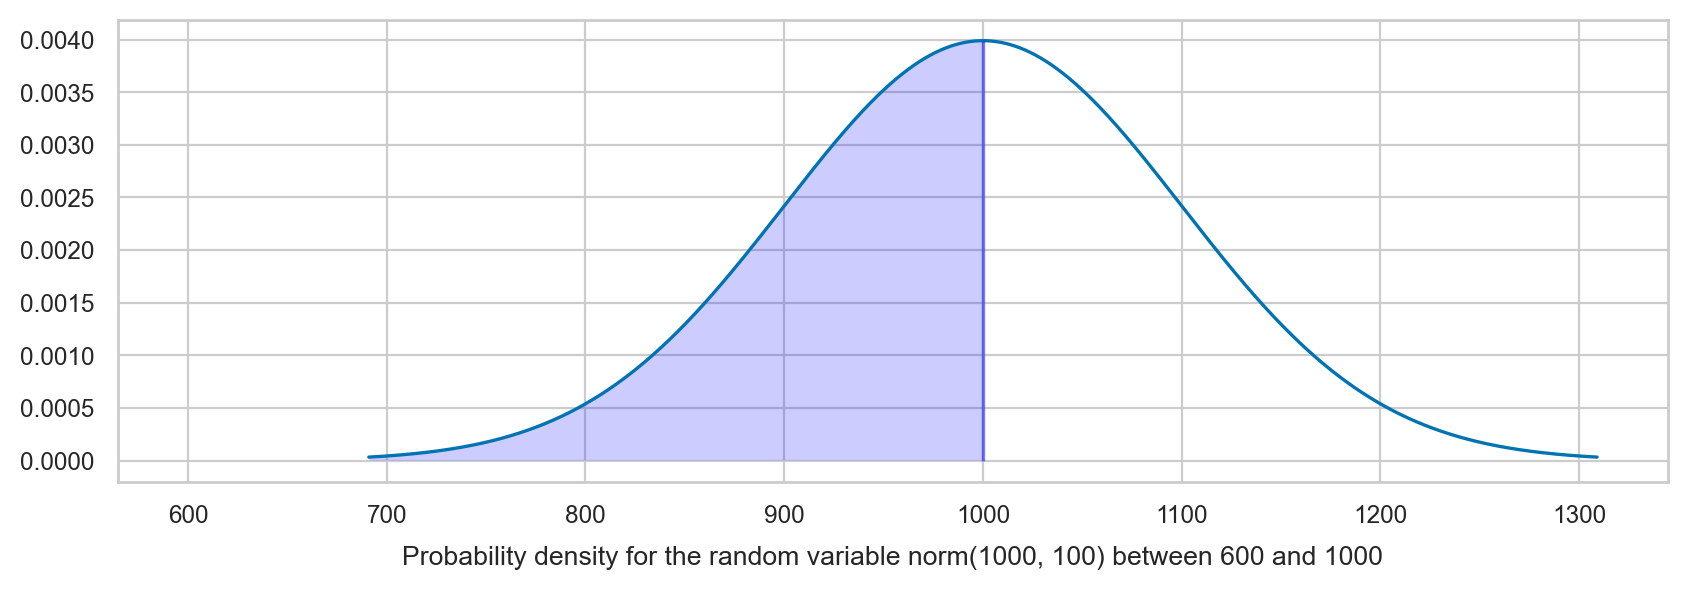

In [73]:
calc_prob_and_plot(rvN, 600, 1000)

In [74]:
# what type of object is rvH?
from scipy.stats import poisson
rvH = poisson(20)
type(rvH)

scipy.stats._distn_infrastructure.rv_discrete_frozen

The above line tells us some information about the internal implementation of the Python object `rvH`,
which is the Python implementation of the random variable $H \sim \textrm{Pois}(20)$.
The `rvH` object is an instance of the class `rv_frozen` (frozen random variable).
Ignore the frozen part. The key part is that it's a random variable.

### Beta function

In [75]:
from scipy.special import beta as betaf

In [76]:
betaf(1,1)

1.0

In [77]:
betaf(2,1)

0.5

In [78]:
betaf(3,2)

0.08333333333333333

In [79]:
# # Graph of betaf
# x = np.linspace(0.05, 5, 100)
# y = np.linspace(0.05, 5, 100)
# X, Y = np.meshgrid(x, y)
# Z = betaf(X, Y)

# # Controur plot
# # plt.contour(X, Y, Z)

# # 3D surface plot
# fig = plt.figure(figsize=(6,6))
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(X, Y, Z)

### Kombucha-temperature dependence

### Kombuncha production dataset story

Let's say have collected the data from the kombucha bottling plant from past month.
You have a sample of $m=1000$ observations of two variables:
- `t`: the temperature in C
- `n`: the volume of kombucha that went into the bottle

You have a suspicion that the bottling temperature might be causing a variation in the volume.

You want to use "data science" to check if a relationship between $t$ and $n$ exists,
and if it exists you want to use it to your advantage to improve the reliability of the kombucha bottling process.

Recall that your distributor only pays for bottles that are within "spec" (mean of 1000 +/- 2 times std = $[800,1200]$),
and the current bottling process only produces "up to spec" bottles only ... percent of the time.

If there is a relationship between temperature `t` and bottled volume `n` then we should be able to find it if we collect lots of `(t,n)` data observations from the bottling process.

In [80]:
from scipy.stats import norm

m = 700

# temperature is normally distrubted around 20 with std 2
rvT = norm(20,2)
ts = rvT.rvs(m)

# kombucha volume normally distr
meanN = 1000 + (ts-rvT.mean())*35
sigmaN = 75
rvN = norm(meanN, sigmaN)

ns = rvN.rvs(m)


# sns.displot(x=ns, y=ts)

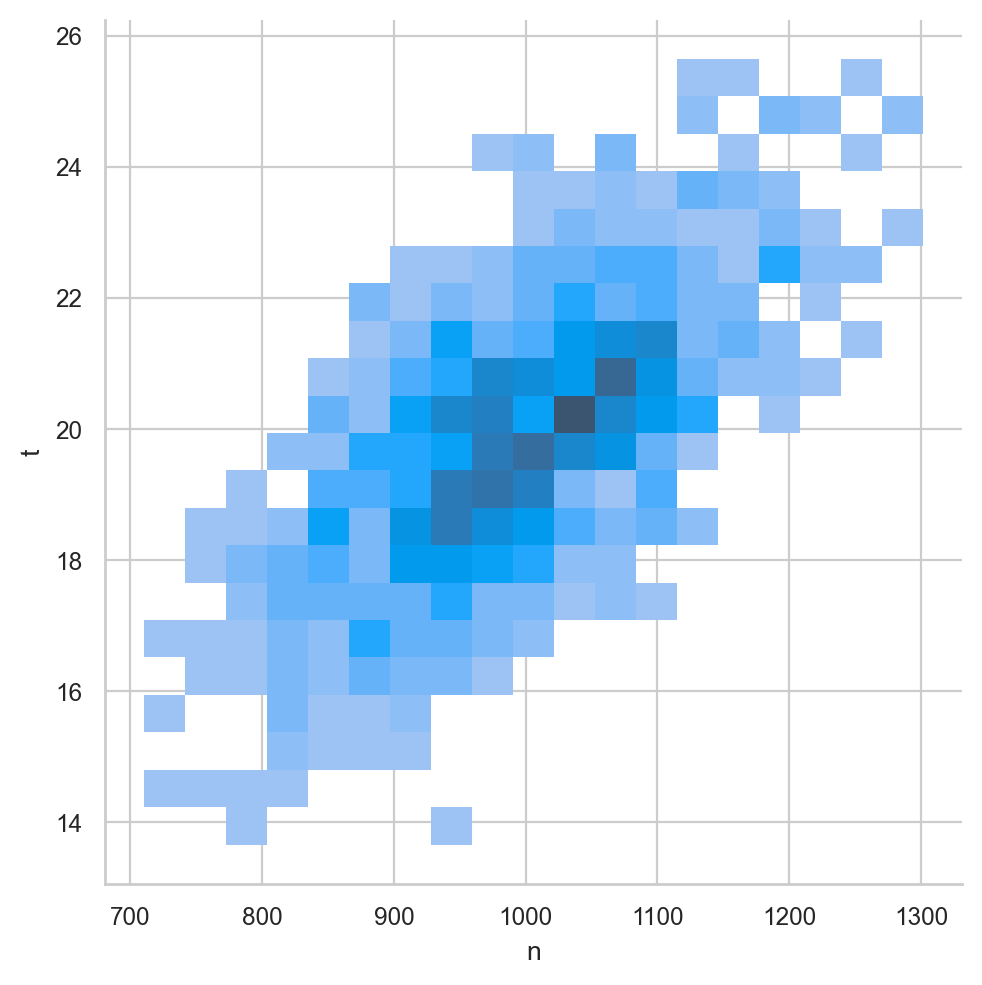

In [81]:
kprod = pd.DataFrame({"t":ts, "n":ns})
sns.displot(data=kprod, x="n", y="t")

In [82]:
# check data
# ns.shape
# kprod["t"]
# kprod["n"] # came from the numpy array `ns`

In [83]:
kprod["n"].std()

102.96028452378567

In [84]:
kprod["n"].mean()

994.9137217254039

In [85]:
# # save data to kprod.csv
# kprod.to_csv("../datasets/kprod.csv")

In [86]:
kprod = pd.read_csv("../datasets/cut_material/kprod.csv")
kprod

,Unnamed: 0,t,n
0,0,20.993428,995.565764
1,1,19.723471,1068.997191
2,2,21.295377,992.512421
3,3,23.046060,1000.977493
4,4,19.531693,866.862076
...,...,...,...
695,695,19.380907,992.182772
696,696,20.652266,921.794840
697,697,17.497773,839.550997
698,698,21.848054,1154.712934


In [87]:
kprod.describe()

,Unnamed: 0,t,n
count,700.00000,700.000000,700.000000
mean,349.50000,19.983708,1005.090754
std,202.21688,1.971220,100.728083
min,0.00000,13.517465,619.673850
25%,174.75000,18.610773,937.563085
50%,349.50000,19.997141,1002.065427
75%,524.25000,21.266132,1073.863544
max,699.00000,27.705463,1431.935309


## Plots inspired by seaborn docs


In [88]:
# penguins = sns.load_dataset("penguins")


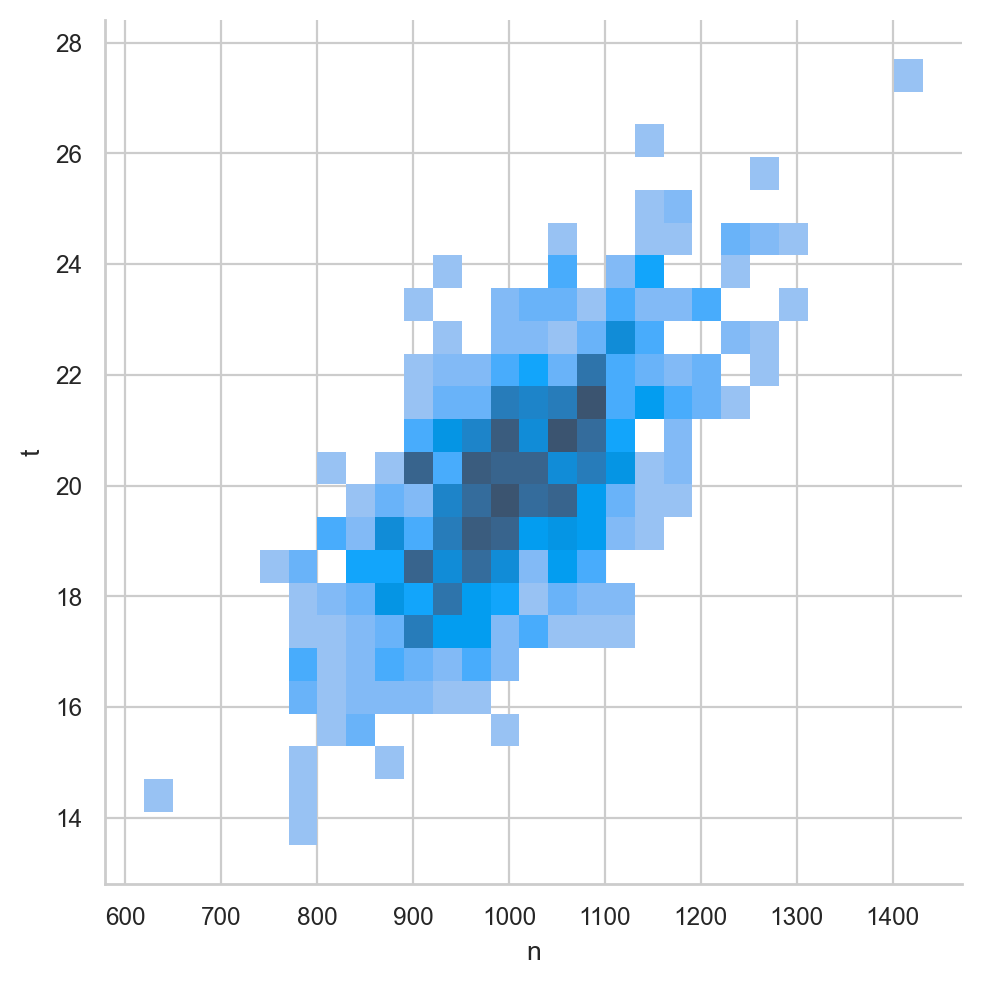

In [89]:
sns.displot(data=kprod, x="n", y="t")

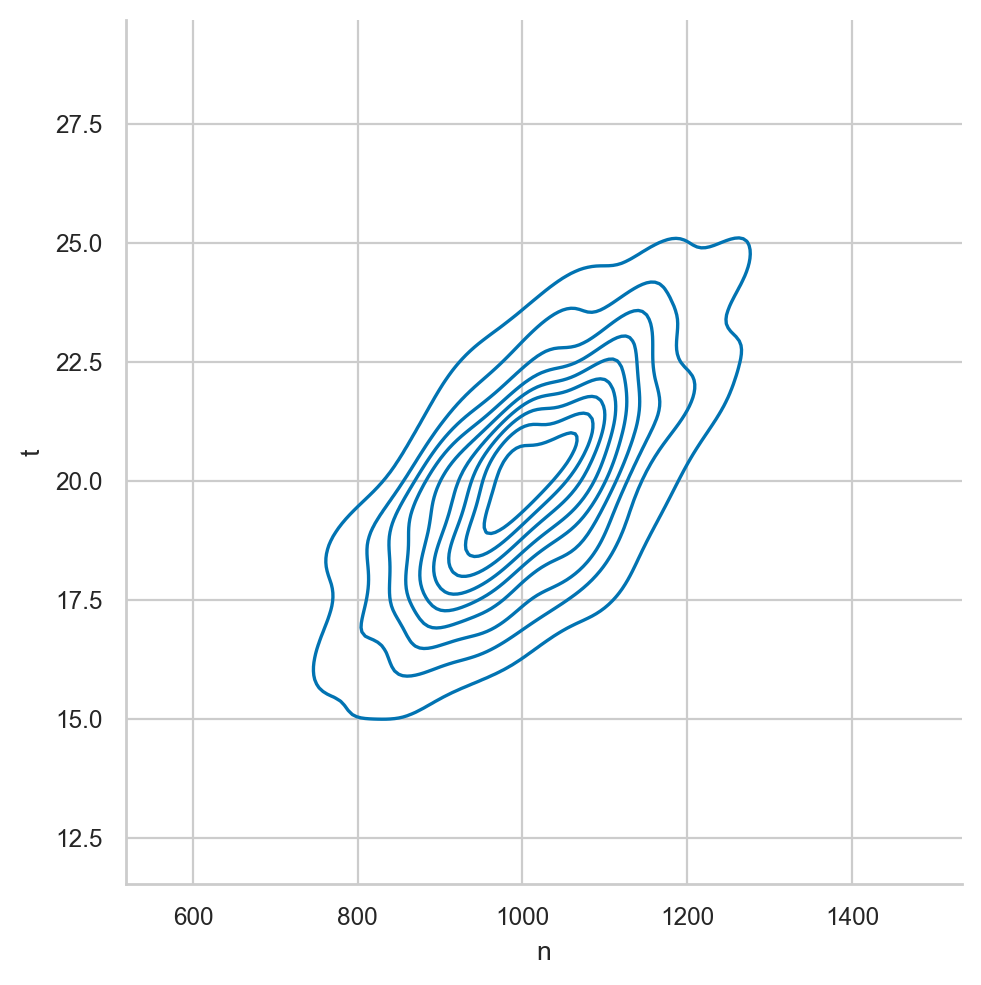

In [90]:
sns.displot(data=kprod, x="n", y="t", kind="kde")

In [91]:
# # ALT 1. fewer levels
# sns.displot(data=kprod, x="n", y="t", kind="kde", thresh=.2, levels=4)

In [92]:
# # ALT 2. specific levels
# sns.displot(data=kprod, x="n", y="t", kind="kde", levels=[.01, .05, .1, .8])

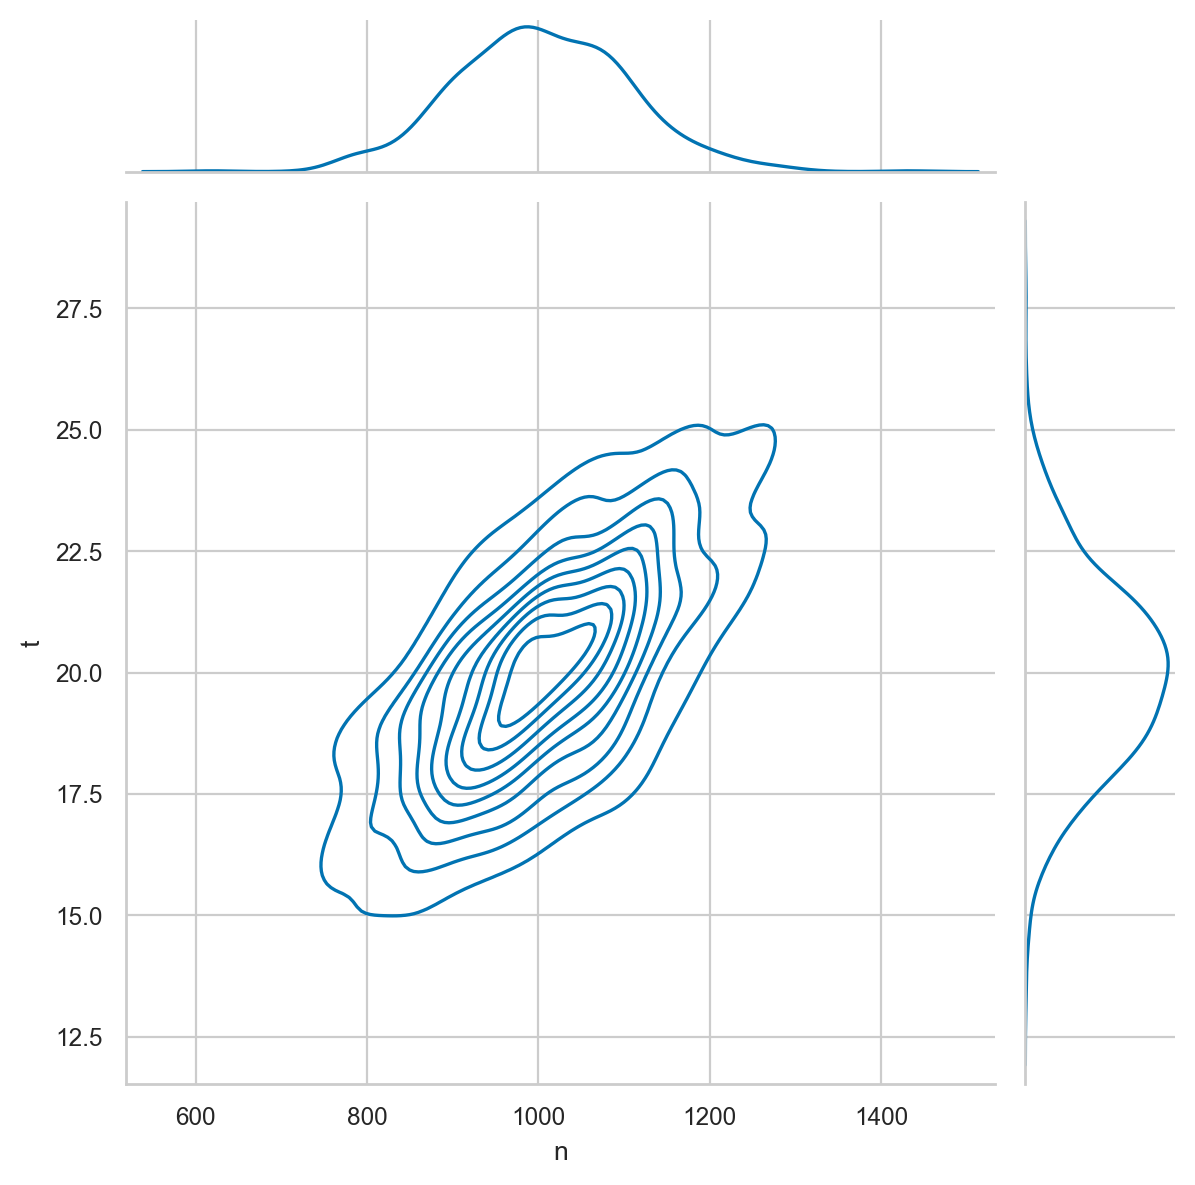

In [93]:
sns.jointplot(data=kprod, x="n", y="t", kind="kde")

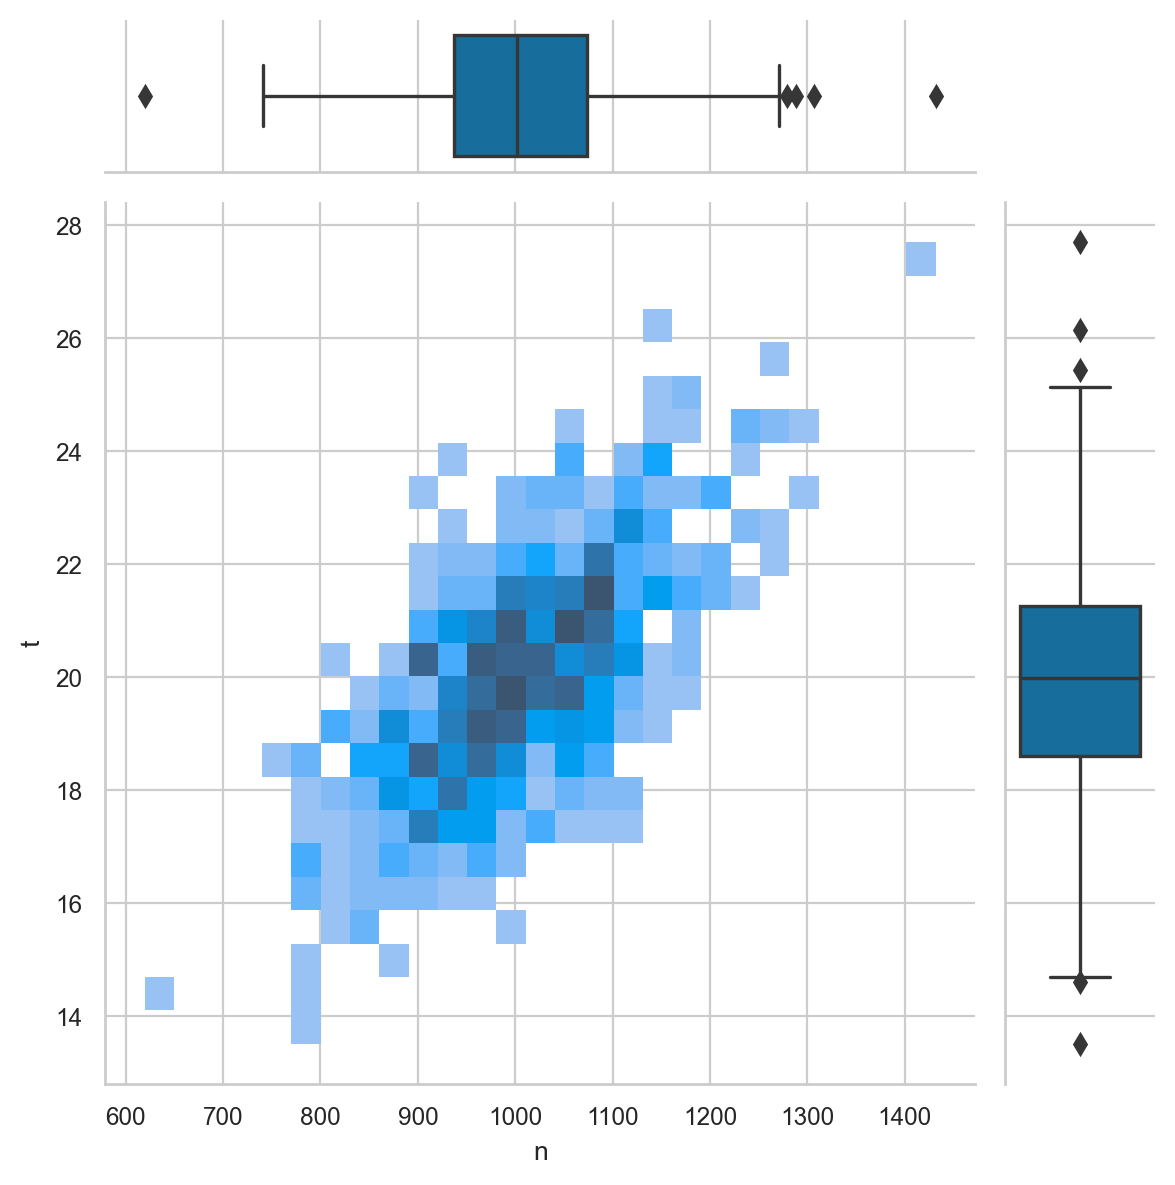

In [94]:
g = sns.JointGrid(data=kprod, x="n", y="t")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)


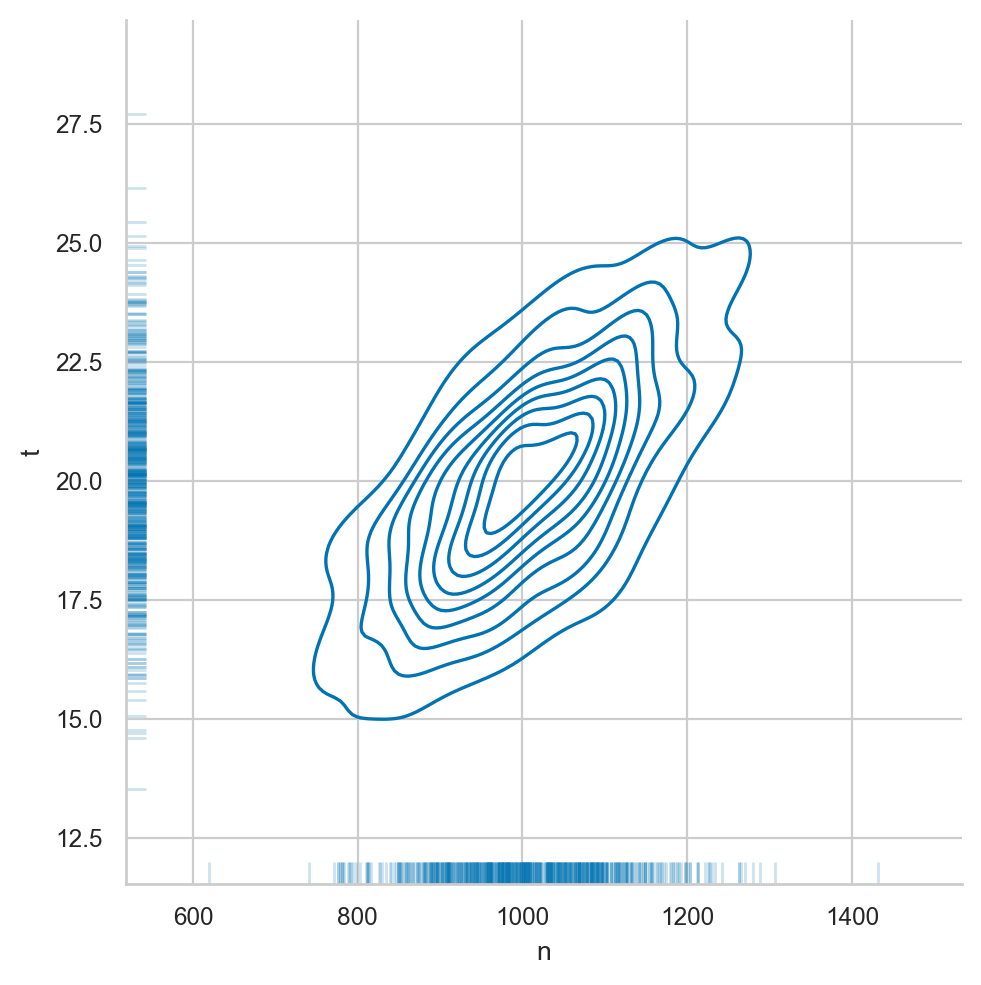

In [95]:
sns.displot(data=kprod, x="n", y="t", kind="kde",
            rug=True, rug_kws={"alpha":0.2})

## Other 3D and surface plot examples

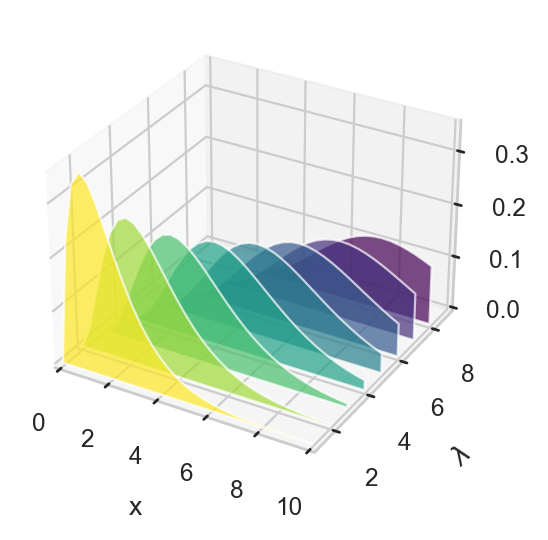

In [96]:
# via https://matplotlib.org/stable/gallery/mplot3d/polys3d.html

from matplotlib.collections import PolyCollection
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson

# Fixing random state for reproducibility
np.random.seed(19680801)


def polygon_under_graph(x, y):
    """
    Construct the vertex list which defines the polygon filling the space under
    the (x, y) line graph. This assumes x is in ascending order.
    """
    return [(x[0], 0.), *zip(x, y), (x[-1], 0.)]


ax = plt.figure().add_subplot(projection='3d')

x = np.linspace(0., 10., 31)
lambdas = range(1, 9)

# verts[i] is a list of (x, y) pairs defining polygon i.
verts = [polygon_under_graph(x, poisson.pmf(l, x)) for l in lambdas]
facecolors = plt.colormaps['viridis_r'](np.linspace(0, 1, len(verts)))

poly = PolyCollection(verts, facecolors=facecolors, alpha=.7)
ax.add_collection3d(poly, zs=lambdas, zdir='y')

ax.set(xlim=(0, 10), ylim=(1, 9), zlim=(0, 0.35),
       xlabel='x', ylabel=r'$\lambda$', zlabel='probability')

plt.show()

In [97]:
# verts[0]

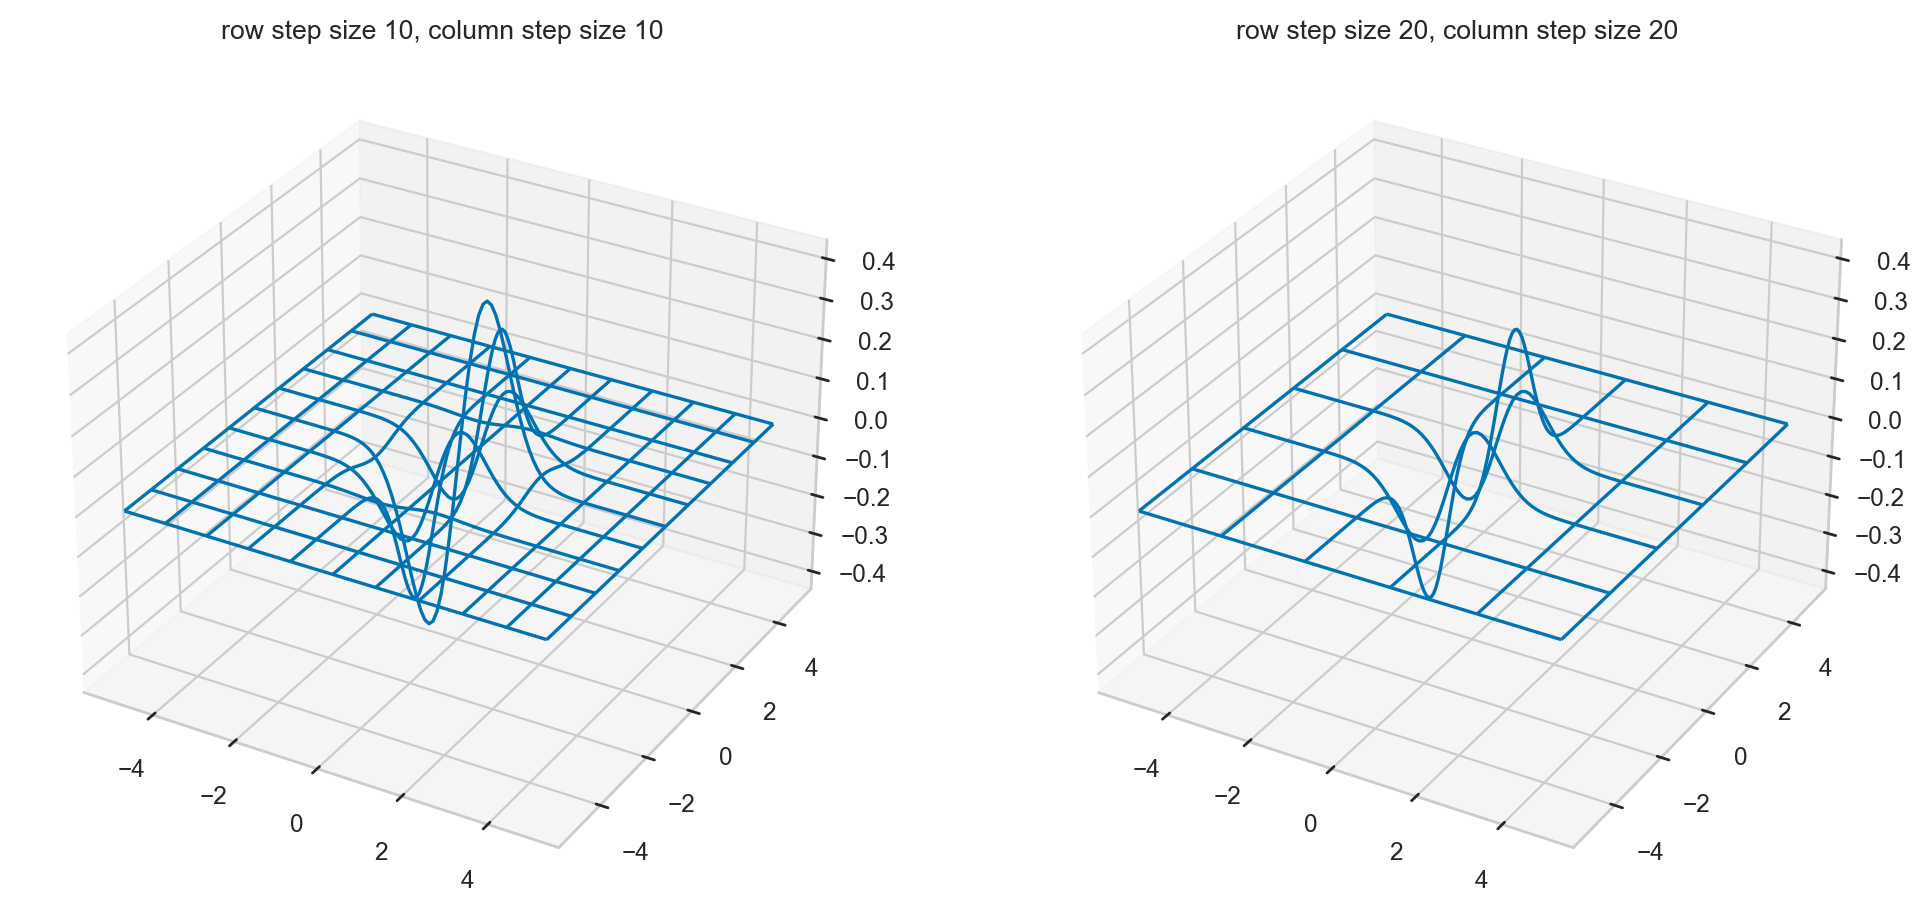

In [98]:
# via https://problemsolvingwithpython.com/06-Plotting-with-Matplotlib/06.16-3D-Surface-Plots/
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
# if using a Jupyter notebook, include:
%matplotlib inline




fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

x = np.arange(-5,5,0.1)
y = np.arange(-5,5,0.1)
X,Y = np.meshgrid(x,y)
Z = X*np.exp(-X**2 - Y**2)

# Plot a basic wireframe
ax1.plot_wireframe(X, Y, Z, rstride=10, cstride=10)
ax1.set_title('row step size 10, column step size 10')

ax2.plot_wireframe(X, Y, Z, rstride=20, cstride=20)
ax2.set_title('row step size 20, column step size 20')

plt.show()




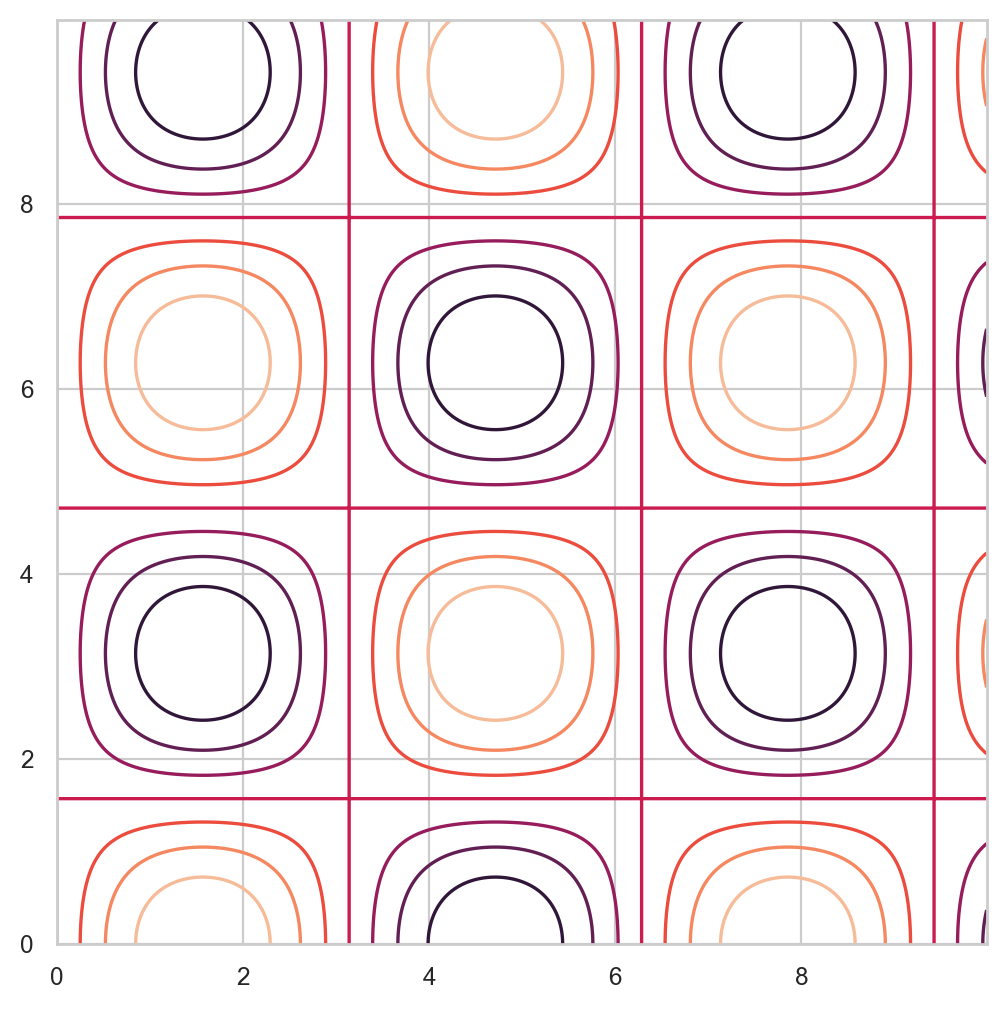

In [99]:
# via https://problemsolvingwithpython.com/06-Plotting-with-Matplotlib/06.14-Contour-Plots/

import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline


x = np.arange(0, 10.0, 0.01)
y = np.arange(0, 10.0, 0.01)

X, Y = np.meshgrid(x, y)

Z = np.sin(X)*np.cos(Y)

fig, ax = plt.subplots(figsize=(6,6))

# ax.contourf(X,Y,Z)
ax.contour(X,Y,Z)

plt.show()



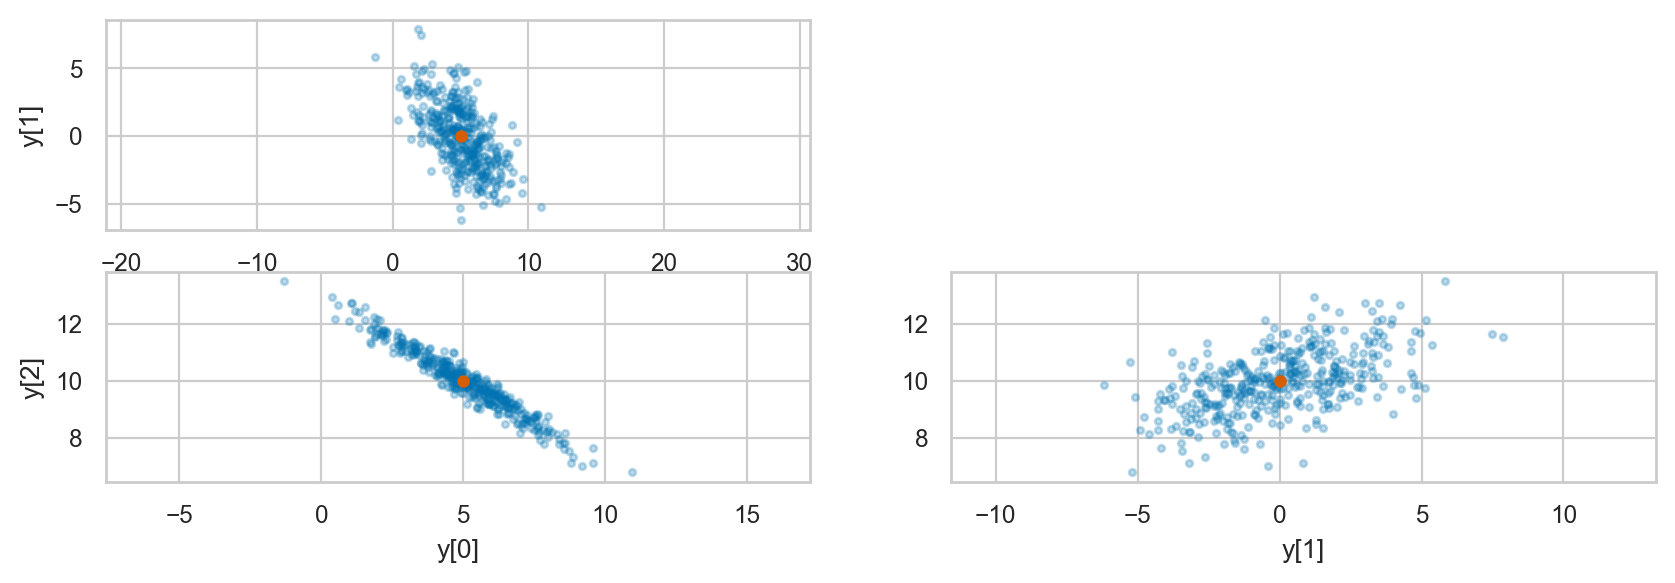

In [100]:
# via https://stackoverflow.com/questions/16024677/generate-correlated-data-in-python-3-3

import numpy as np
import matplotlib.pyplot as plt


num_samples = 400

# The desired mean values of the sample.
mu = np.array([5.0, 0.0, 10.0])

# The desired covariance matrix.
r = np.array([
        [  3.40, -2.75, -2.00],
        [ -2.75,  5.50,  1.50],
        [ -2.00,  1.50,  1.25]
    ])

# Generate the random samples.
rng = np.random.default_rng()
y = rng.multivariate_normal(mu, r, size=num_samples)


# Plot various projections of the samples.
plt.subplot(2,2,1)
plt.plot(y[:,0], y[:,1], 'b.', alpha=0.25)
plt.plot(mu[0], mu[1], 'ro', ms=3.5)
plt.ylabel('y[1]')
plt.axis('equal')
plt.grid(True)

plt.subplot(2,2,3)
plt.plot(y[:,0], y[:,2], 'b.', alpha=0.25)
plt.plot(mu[0], mu[2], 'ro', ms=3.5)
plt.xlabel('y[0]')
plt.ylabel('y[2]')
plt.axis('equal')
plt.grid(True)

plt.subplot(2,2,4)
plt.plot(y[:,1], y[:,2], 'b.', alpha=0.25)
plt.plot(mu[1], mu[2], 'ro', ms=3.5)
plt.xlabel('y[1]')
plt.axis('equal')
plt.grid(True)

plt.show()

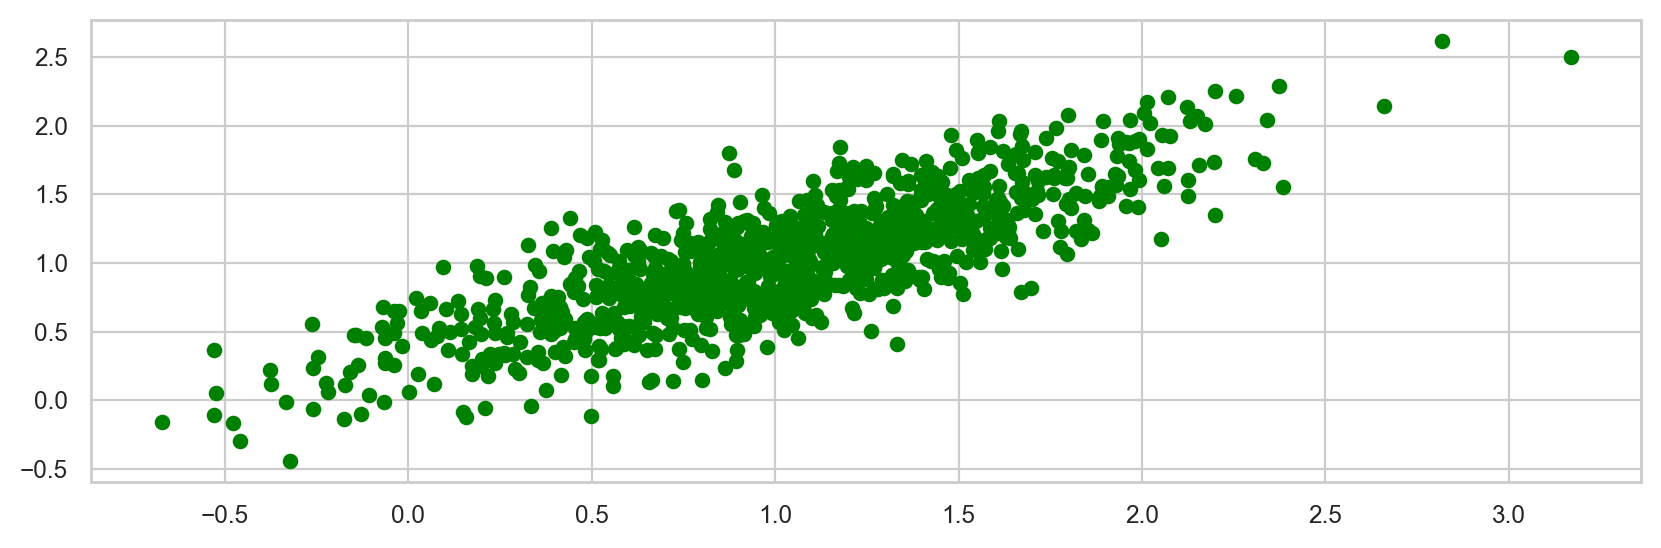

In [101]:
import numpy as np
import matplotlib.pyplot as plt
linalg = np.linalg
np.random.seed(1)

num_samples = 1000
num_variables = 2
cov = [[0.3, 0.2], [0.2, 0.2]]

L = linalg.cholesky(cov)
# print(L.shape)
# (2, 2)
uncorrelated = np.random.standard_normal((num_variables, num_samples))
mean = [1, 1]
correlated = np.dot(L, uncorrelated) + np.array(mean).reshape(2, 1)
# print(correlated.shape)
# (2, 1000)
plt.scatter(correlated[0, :], correlated[1, :], c='green')
plt.show()

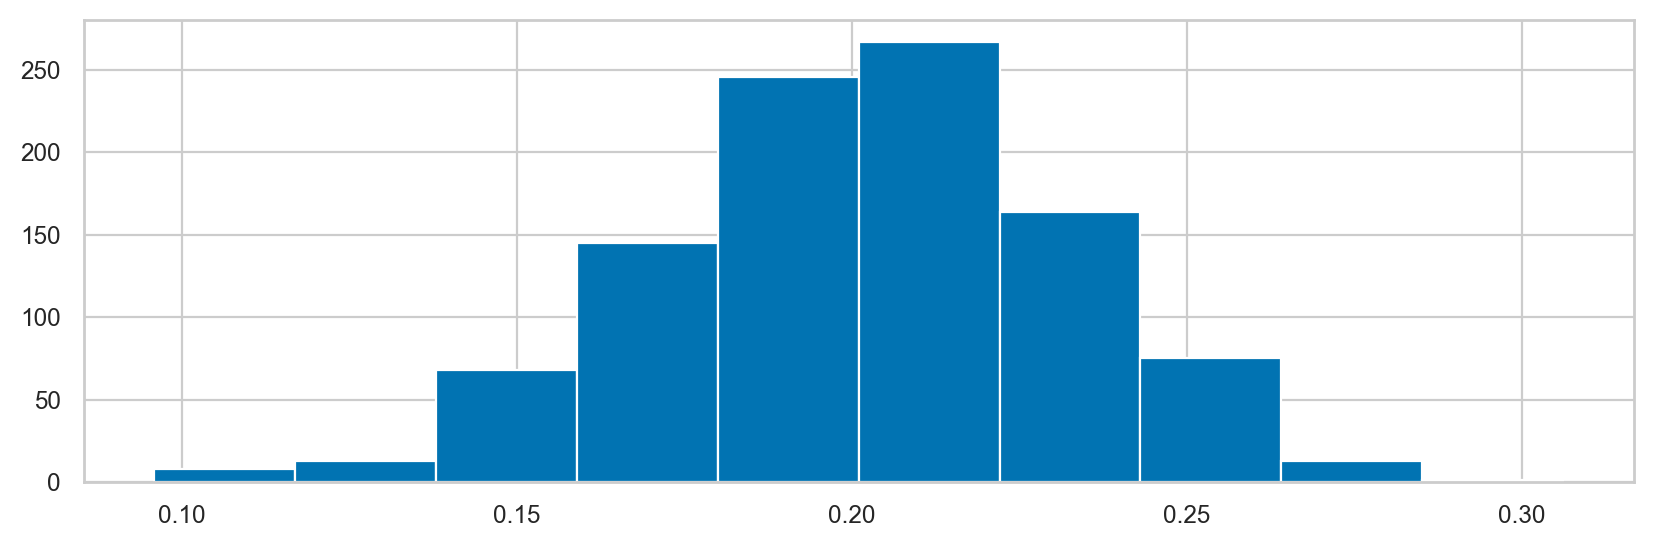

In [102]:
# via https://stackoverflow.com/questions/16024677/generate-correlated-data-in-python-3-3

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
linalg = np.linalg
np.random.seed(1)

num_samples = 1000
num_variables = 2
cov = [[1.0, 0.2], [0.2, 1.0]]

L = linalg.cholesky(cov)

rhos = []
for i in range(1000):
    uncorrelated = np.random.standard_normal((num_variables, num_samples))
    correlated = np.dot(L, uncorrelated)
    X, Y = correlated
    rho, pval = stats.pearsonr(X, Y)
    rhos.append(rho)

plt.hist(rhos)
plt.show()

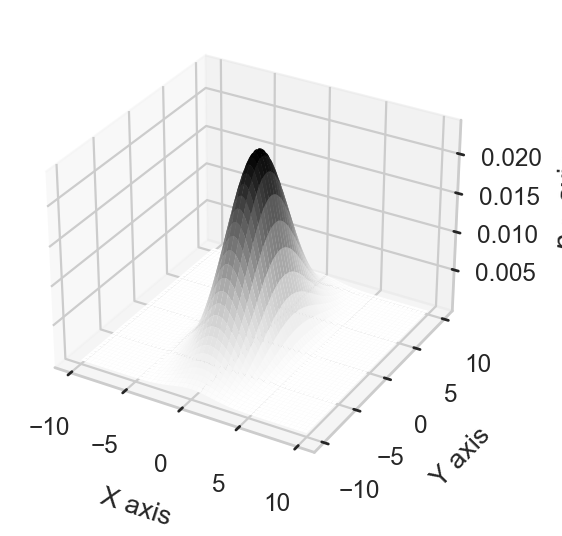

In [103]:
# via https://stackoverflow.com/questions/38698277/plot-normal-distribution-in-3d
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

#Parameters to set
mu_x = 0
variance_x = 3

mu_y = 0
variance_y = 15

#Create grid and multivariate normal
x = np.linspace(-10,10,500)
y = np.linspace(-10,10,500)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y
rv = multivariate_normal([mu_x, mu_y], [[variance_x, 0], [0, variance_y]])

#Make a 3D plot
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, rv.pdf(pos), cmap='Greys', linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('$p_{XY}$ axis')
plt.show()


In [104]:
pos.shape

(500, 500, 2)

In [105]:
rv.pdf(pos).shape

(500, 500)

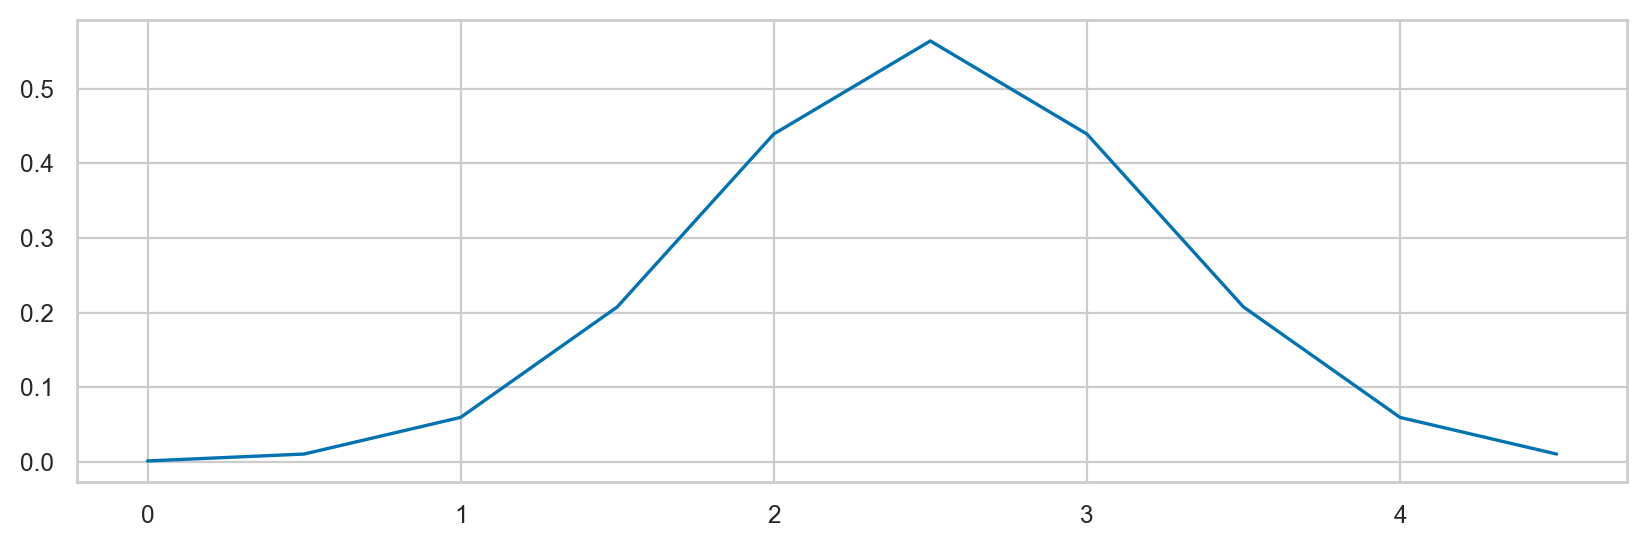

In [106]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html#scipy.stats.multivariate_normal

from scipy.stats import multivariate_normal

x = np.linspace(0, 5, 10, endpoint=False)

y = multivariate_normal.pdf(x, mean=2.5, cov=0.5)

fig1 = plt.figure()

ax = fig1.add_subplot(111)

ax.plot(x, y)

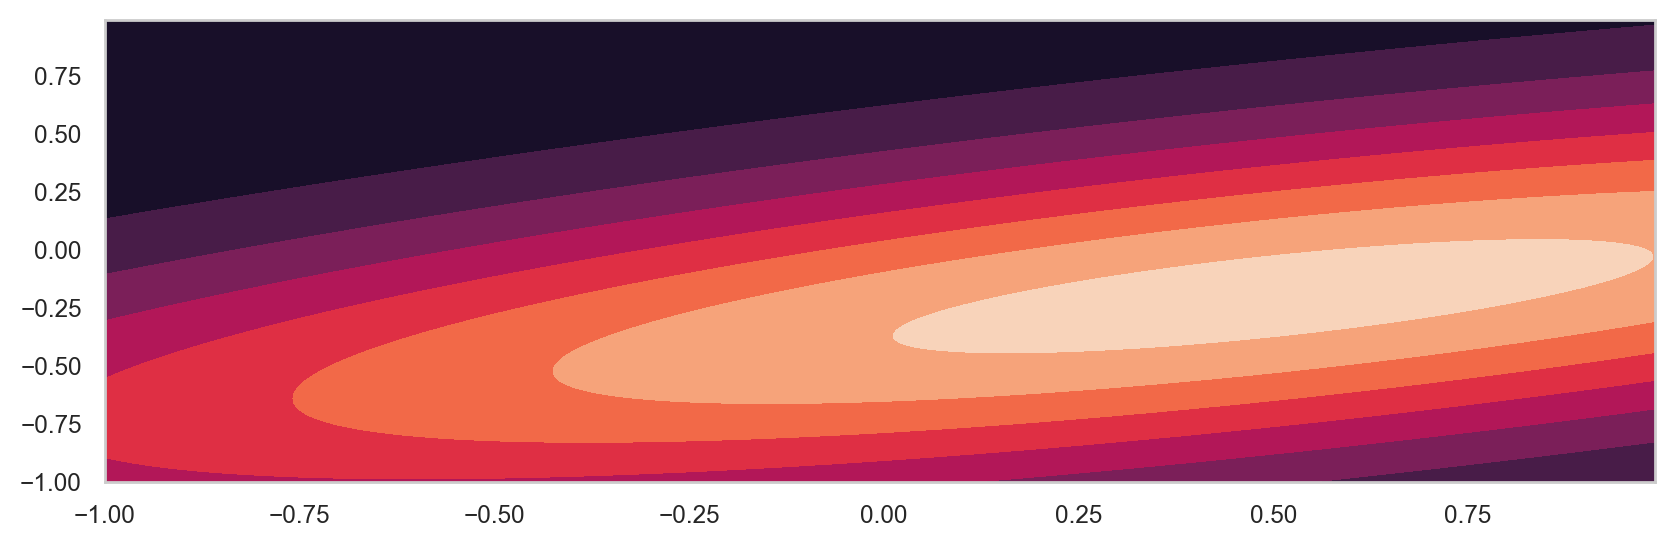

In [107]:
x, y = np.mgrid[-1:1:.01, -1:1:.01]

pos = np.dstack((x, y))

mu = [0.5, -0.2]
Sigma = [[2.0, 0.7], [0.7, 0.5]]
rv = multivariate_normal(mu, Sigma)


fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contourf(x, y, rv.pdf(pos))

In [108]:
rv.pdf(pos)

array([[0.10948266, 0.11064805, 0.11178199, ..., 0.00045415, 0.00042486,
        0.0003973 ],
       [0.10988591, 0.11107083, 0.11222452, ..., 0.00046831, 0.00043817,
        0.00040981],
       [0.11027983, 0.11148431, 0.11265774, ..., 0.00048287, 0.00045186,
        0.00042267],
       ...,
       [0.03403147, 0.03533639, 0.03667695, ..., 0.02904694, 0.02791839,
        0.02682317],
       [0.03350345, 0.0347929 , 0.0361178 , ..., 0.02938003, 0.02824242,
        0.02713821],
       [0.03298039, 0.03425441, 0.03556368, ..., 0.02971402, 0.0285674 ,
        0.02745425]])

<AxesSubplot: >

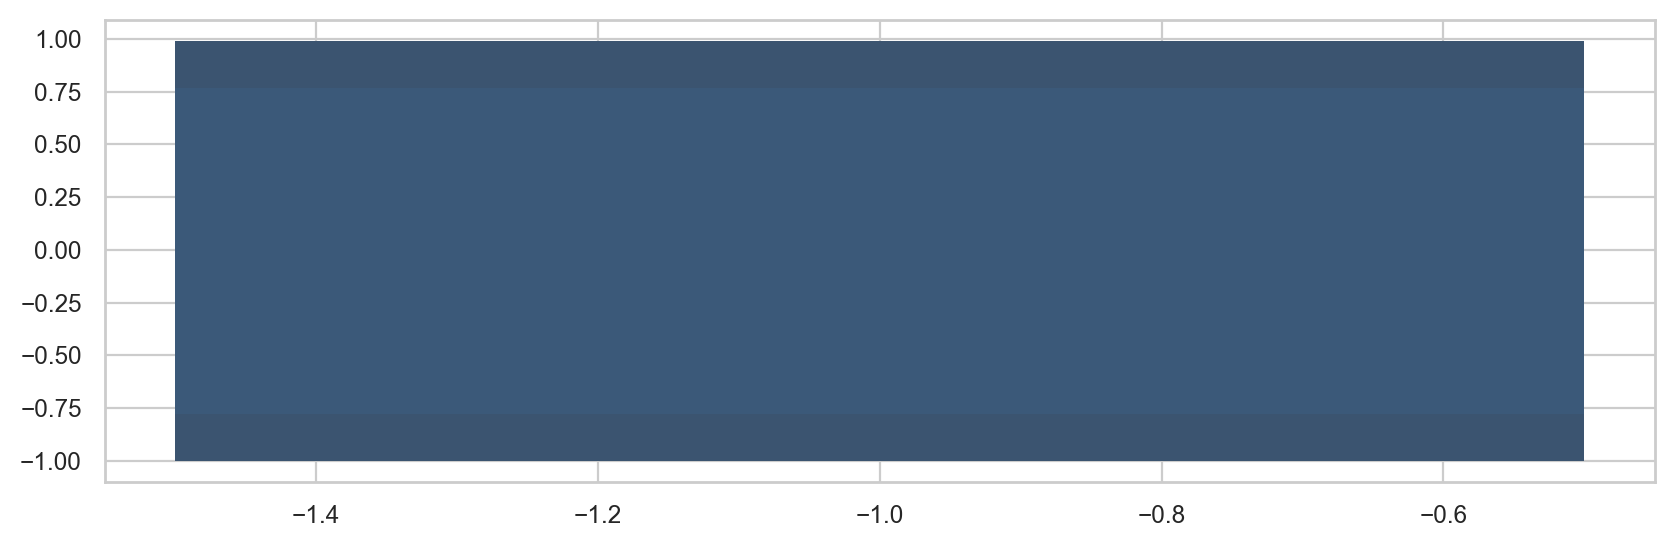

In [109]:
sns.histplot(x=x[0], y=y[0])

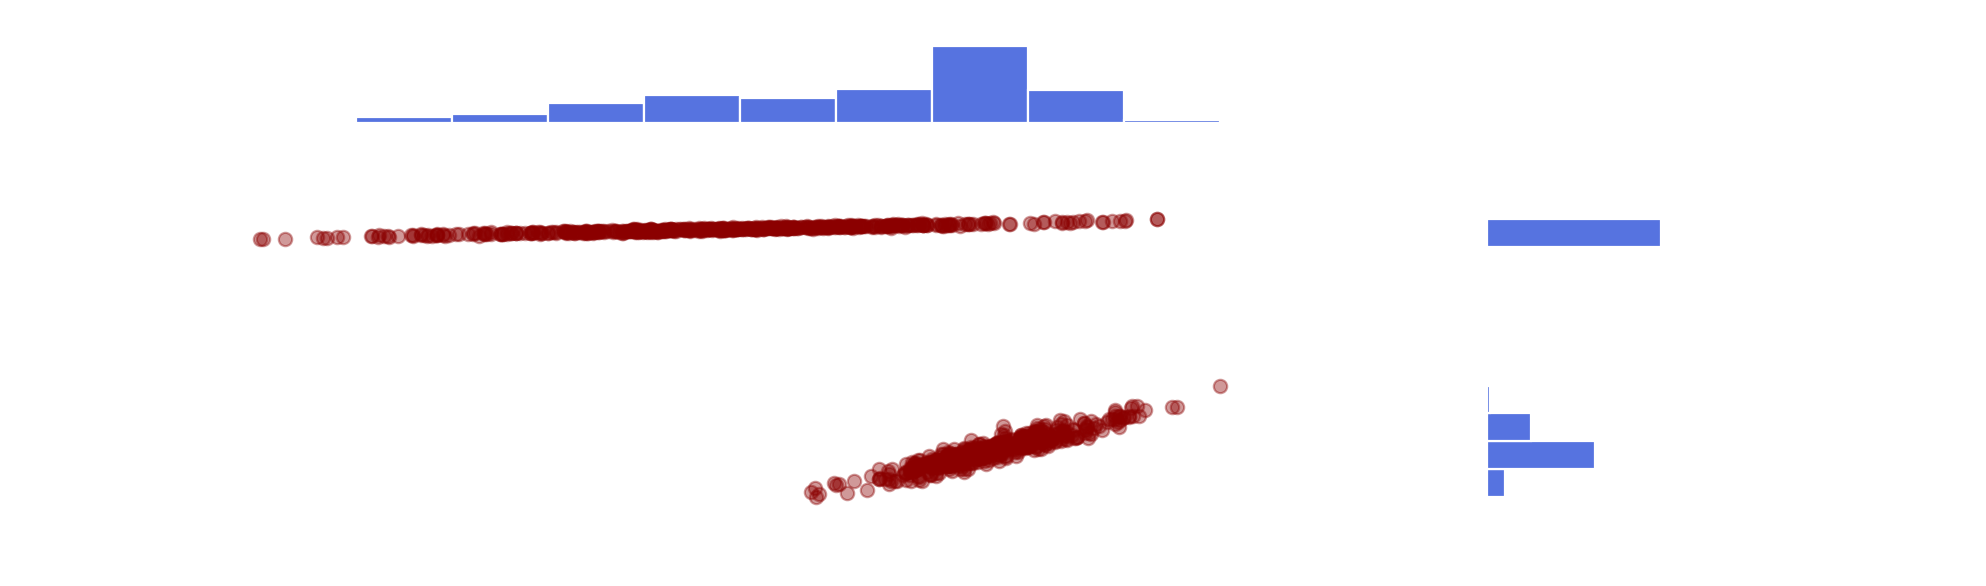

In [110]:
# via http://cxhernandez.com/tutorials/dataviz/2014/11/19/jointplot-d3.html

from matplotlib import pyplot as plt
from matplotlib import gridspec


def gen_cov(n):
    A = np.random.rand(n, n)
    return np.dot(A, A.T)


n = 2
m = 2
mu = list(map(lambda x: np.random.normal(size = x)*np.random.randint(1,11) + np.random.normal(size = x), n*[m]))
sigma = list(map(gen_cov, n*[m]))

N = 500
data = np.vstack(
    list(
        map(
            lambda i: np.random.multivariate_normal(mu[i], sigma[i], N),
            range(n)
           )
         )
).T


xmin, ymin = data.min(axis=1)
xmax, ymax = data.max(axis=1)

xmax, xmin = tuple(np.array([xmax, xmin]) + 0.25*(xmax - xmin)*np.array([1, -1]))
ymax, ymin = tuple(np.array([ymax, ymin]) + 0.25*(ymax - ymin)*np.array([1, -1]))



#Define grid for subplots
gs = gridspec.GridSpec(2, 2, width_ratios=[3, 1], height_ratios = [1, 4])

#Create scatter plot
fig = plt.figure()
ax = plt.subplot(gs[1, 0])
cax = ax.scatter(data[0], data[1], color='darkred', alpha=.4)

#Turn off all axes
_=ax.axis('off')

#Create Y-marginal (right)
axr = plt.subplot(gs[1, 1], sharey=ax, xticks=[], yticks=[],frameon = False, xlim=(0, 1), ylim = (ymin, ymax))
axr.hist(data[1], color = '#5673E0', orientation = 'horizontal', density = True)

#Create X-marginal (top)
axt = plt.subplot(gs[0,0], sharex=ax,frameon = False, xticks = [], yticks = [], xlim = (xmin, xmax), ylim=(0, 1))
axt.hist(data[0], color = '#5673E0', density = True)

#Bring the marginals closer to the scatter plot
fig.tight_layout(pad = 1)

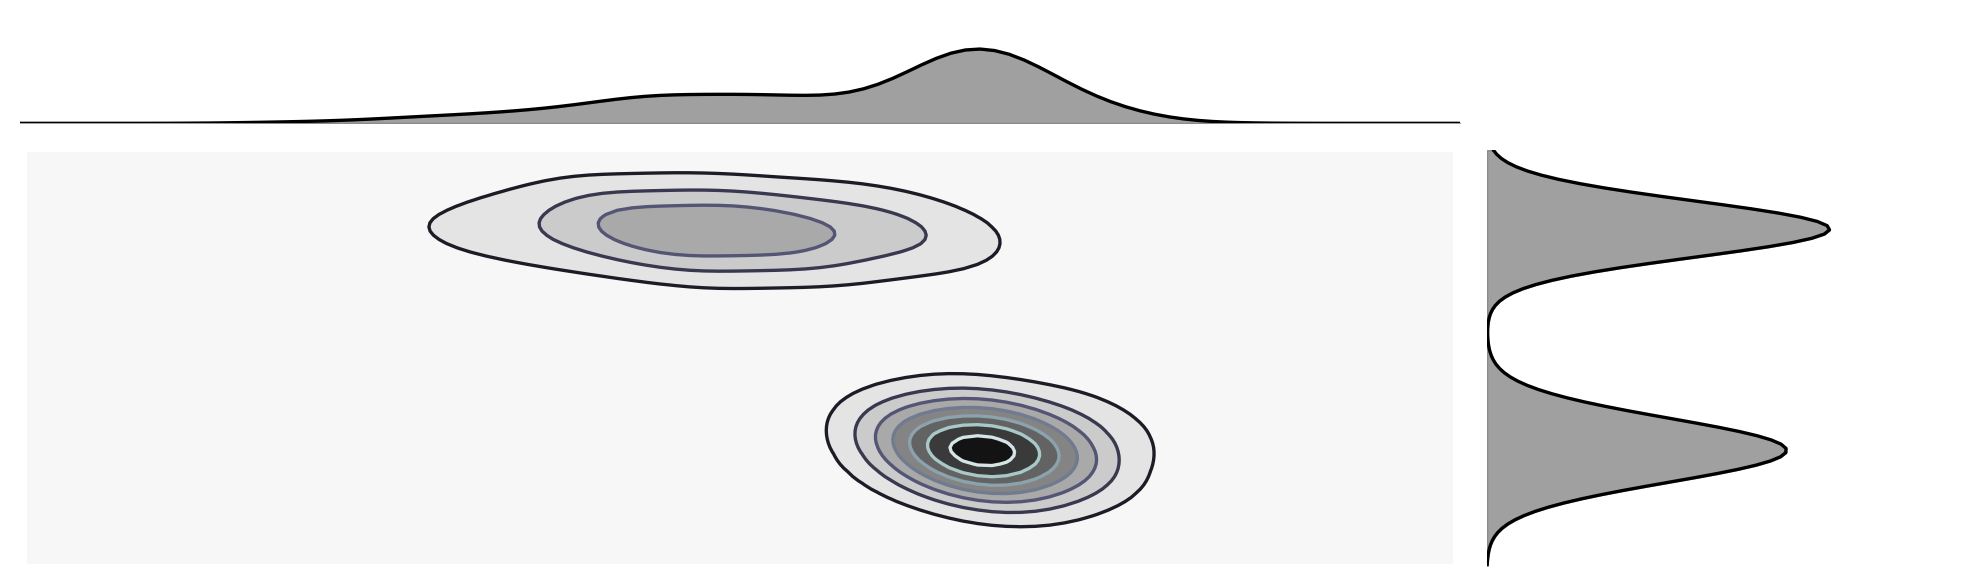

In [111]:
from matplotlib import cm
from scipy.stats import gaussian_kde


#KDE for top marginal
kde_X = gaussian_kde(data[0])
#KDE for right marginal
kde_Y = gaussian_kde(data[1])
#KDE for contour plot
kde_XY = gaussian_kde(data)

# Create two 1D grid with 100 points in each dimension
x = np.linspace(xmin, xmax, 100)
y = np.linspace(ymin, ymax, 100)

# Create a regular 2D grid with 100 points in each dimension
xi, yi = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
coords = np.vstack([item.ravel() for item in [xi, yi]])

# Evaluate the KDEs on a 1D grid
dx = kde_X(x) # X-marginal density
dy = kde_Y(y) # Y-marginal density

# Evaluate the KDE on a 2D grid
density = kde_XY(coords).reshape(xi.shape) # Bivariate density


#Set style to white
sns.set_style('white')

#Define grid for subplots
gs = gridspec.GridSpec(2, 2, width_ratios=[3, 1], height_ratios=[1, 4])

#Create contour plot
fig = plt.figure()
ax = plt.subplot(gs[1,0])
# Filled Contour
cax = ax.contourf(density.T, origin = 'lower',
                  extent = (xmin, xmax, ymin, ymax),
                  cmap = "Greys") #coolwarm)
# Contour Lines
ax.contour(density.T, origin = 'lower',
           extent = (xmin, xmax, ymin, ymax),
           cmap = cm.bone)

# cbar = fig.colorbar(cax, location="bottom", panchor=(0,0), pad=0)

#Turn off all axes
ax.axis('off')

#Create Y-marginal (right)
axr = plt.subplot(gs[1,1], sharey = ax, xticks = [], yticks = [], frameon = False, xlim = (0, 1.4*dy.max()), ylim=(ymin, ymax))
axr.plot(dy, y, color = 'black')
axr.fill_betweenx(y, 0, dy, alpha = .75, color = 'gray')

#Create X-marginal (top)
axt = plt.subplot(gs[0,0], sharex = ax, frameon = False, xticks=[], yticks=[], xlim = (xmin, xmax), ylim=(0, 1.4*dx.max()))
axt.plot(x, dx, color = 'black')
axt.fill_between(x, 0, dx, alpha=.75, color = 'gray')

#Bring the marginals closer to the contour plot
fig.tight_layout(pad = 1)



### Coin tosses for n=100, n=1000, and n=10000

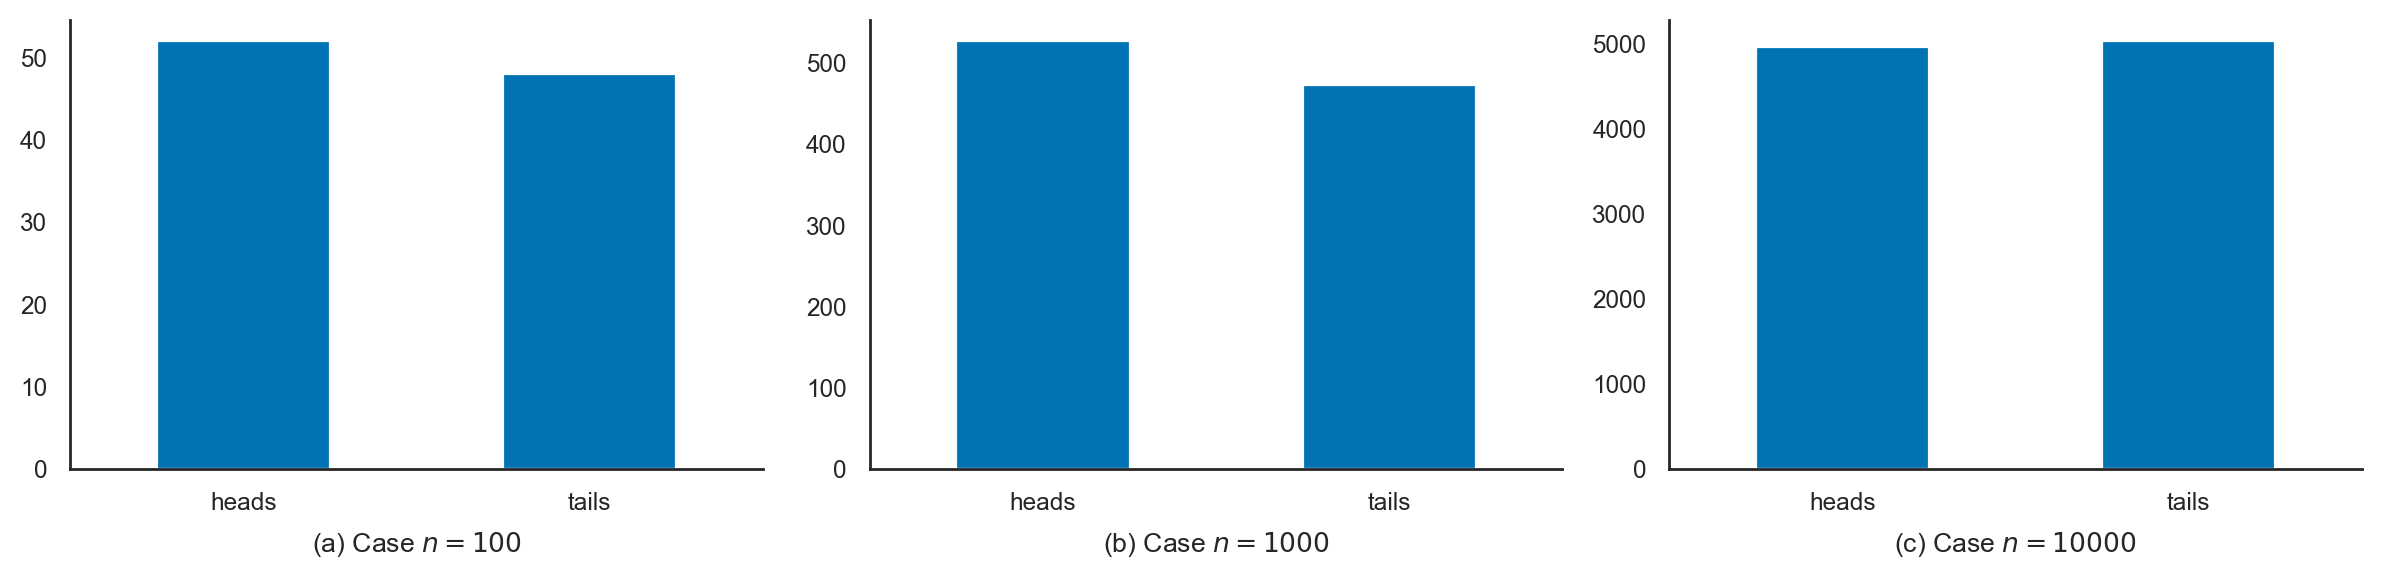

In [112]:
import numpy as np
np.random.seed(15)

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import randint

rvC = randint(0, 2)


filename = "figures/panel_n_coin_flips.pdf"


with plt.rc_context({"figure.figsize":(12,3)}):
    fig, axs = plt.subplots(1, 3)
    ax1, ax2, ax3 = axs

    n = 100
    flips = rvC.rvs(n)
    s = pd.Series(flips).replace(1, "heads").replace(0, "tails")
    # print(f"Case {n=}")
    # print(s.value_counts().sort_index())
    s.value_counts().sort_index().plot(kind="bar", rot=0, ax=ax1)
    title1 = f"(a) Case $n={n}$"
    ax1.set_title(title1, y=0, pad=-30)
    sns.despine(top=True, right=True, ax=ax1)

    n = 1000
    flips = rvC.rvs(n)
    s = pd.Series(flips).replace(1, "heads").replace(0, "tails")
    # print(f"Case {n=}")
    # print(s.value_counts().sort_index())
    s.value_counts().sort_index().plot(kind="bar", rot=0, ax=ax2)
    title2 = f"(b) Case $n={n}$"
    ax2.set_title(title2, y=0, pad=-30)
    sns.despine(top=True, right=True, ax=ax2)

    n = 10000
    flips = rvC.rvs(n)
    s = pd.Series(flips).replace(1, "heads").replace(0, "tails")
    # print(f"Case {n=}")
    # print(s.value_counts().sort_index())
    s.value_counts().sort_index().plot(kind="bar", rot=0, ax=ax3)
    title3 = f"(c) Case $n={n}$"
    ax3.set_title(title3, y=0, pad=-30)
    sns.despine(top=True, right=True, ax=ax3)
    
    fig.tight_layout()
    fig.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)


### Dice rolls 600 6000 60000

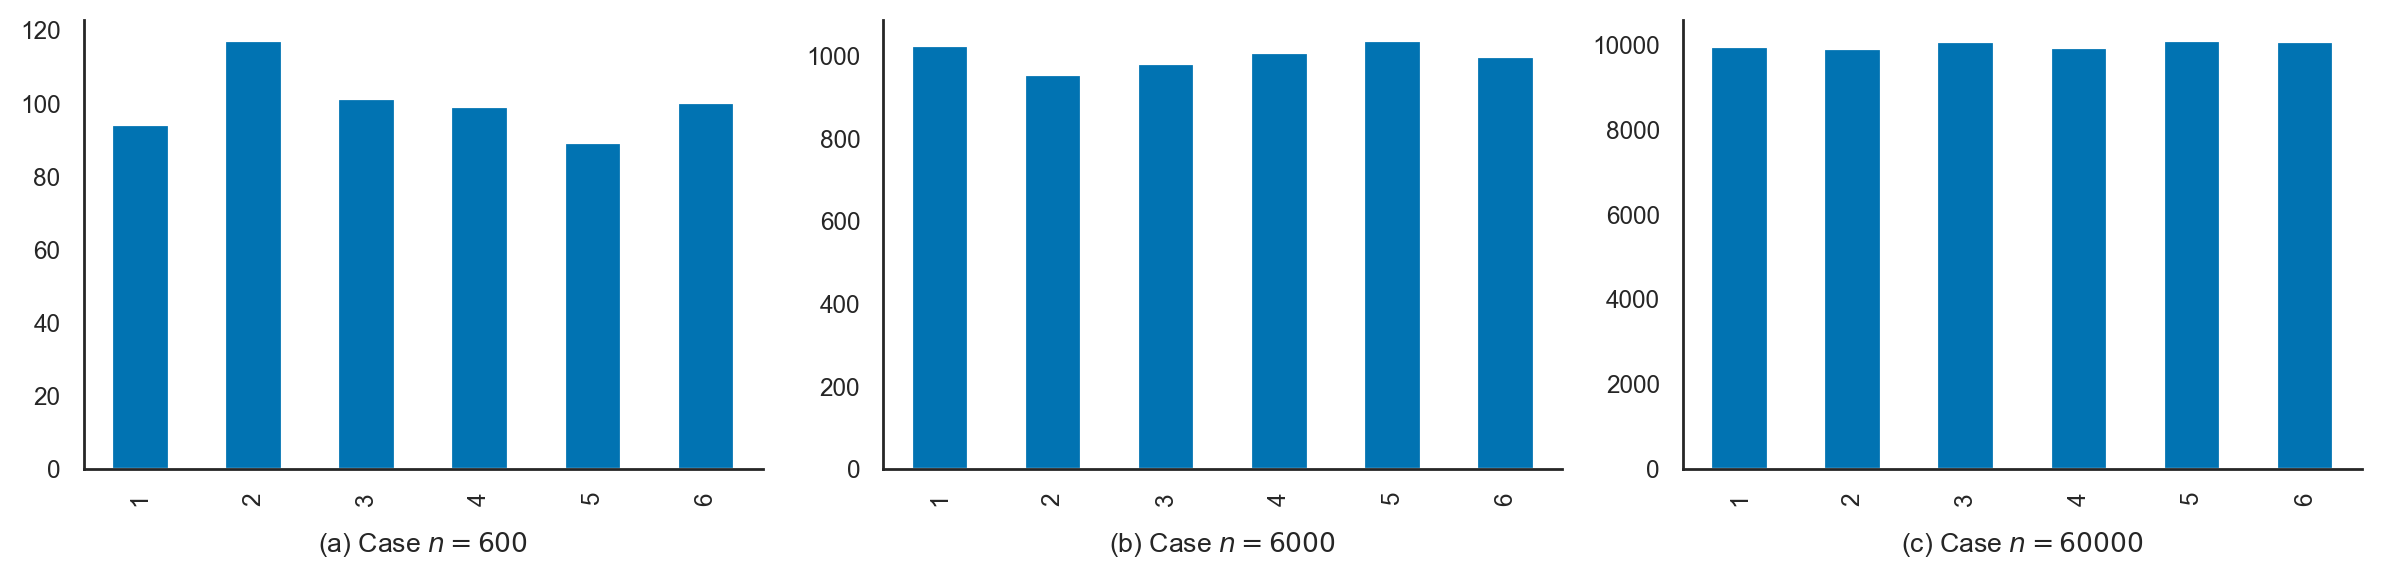

In [113]:
import numpy as np
np.random.seed(5)

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import randint

rvD = randint(1, 7)


filename = "figures/panel_n_dice_rolls.pdf"


with plt.rc_context({"figure.figsize":(12,3)}):
    fig, axs = plt.subplots(1, 3)
    ax1, ax2, ax3 = axs

    n = 600
    rolls = rvD.rvs(n)
    ds = pd.Series(rolls)
    # print(f"Case {n=}")
    # print(ds.value_counts().sort_index())
    ds.value_counts().sort_index().plot(kind="bar", ax=ax1)
    title1 = f"(a) Case $n={n}$"
    ax1.set_title(title1, y=0, pad=-30)
    sns.despine(top=True, right=True, ax=ax1)

    n = 6000
    rolls = rvD.rvs(n)
    ds = pd.Series(rolls)
    # print(f"Case {n=}")
    # print(ds.value_counts().sort_index())
    ds.value_counts().sort_index().plot(kind="bar", ax=ax2)
    title2 = f"(b) Case $n={n}$"
    ax2.set_title(title2, y=0, pad=-30)
    sns.despine(top=True, right=True, ax=ax2)

    n = 60000
    rolls = rvD.rvs(n)
    ds = pd.Series(rolls)
    # print(f"Case {n=}")
    # print(ds.value_counts().sort_index())
    ds.value_counts().sort_index().plot(kind="bar", ax=ax3)
    title3 = f"(c) Case $n={n}$"
    ax3.set_title(title3, y=0, pad=-30)
    sns.despine(top=True, right=True, ax=ax3)

    fig.tight_layout()
    fig.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)


### POC using X^2 + Y^2

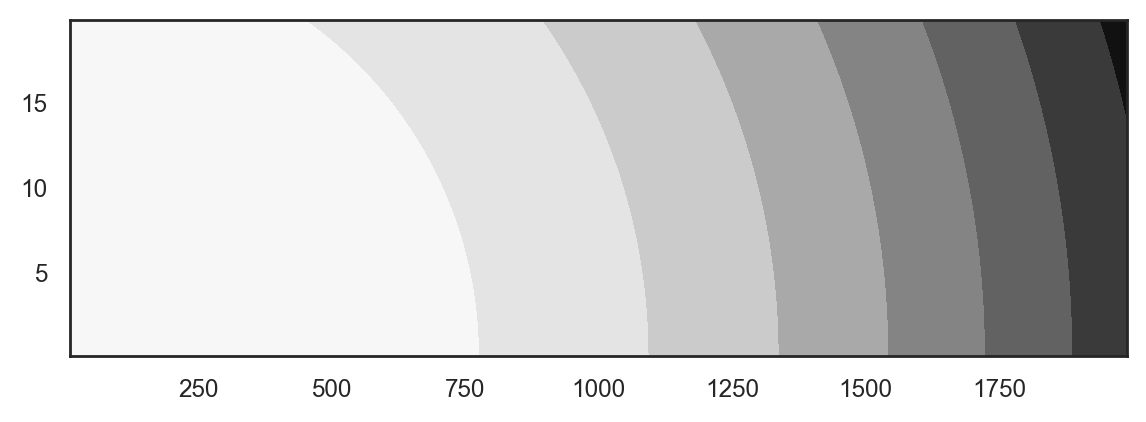

In [114]:
from matplotlib import gridspec

xmin = 0
xmax = 2000
ymin = 0
ymax = 20

# Create two 1D grid with 100 points in each dimension
x = np.linspace(xmin, xmax, 100)
y = np.linspace(ymin, ymax, 100)

X, Y = np.meshgrid(x,y)


Z = X**2 + 1000*Y**2

#Create contour plot
gs = gridspec.GridSpec(2, 2, width_ratios=[3, 1], height_ratios=[1, 4])
fig = plt.figure()
ax = plt.subplot(gs[1,0])
# Filled Contour
cax = ax.contourf(Z, origin = 'lower',
                  extent = (xmin, xmax, ymin, ymax),
                  cmap = "Greys")


In [115]:
# # ALT1: generate N data points using rvs(N)
# N = 10000
# dfXY = pd.DataFrame(rvXY.rvs(N), columns=["x","y"])

# # controur plot
# sns.jointplot(data=dfXY, x="x", y="y",
#               kind="kde")

# # countourf plot
# sns.kdeplot(data=dfXY, x="x", y="y",
#             shade=True, shade_lowest=False)

In [116]:
a = np.array((1,2,3))
b = np.array((2,3,4))
np.dstack((a,b))
np.dstack((a,b)).shape

(1, 3, 2)

In [117]:
x, y = np.mgrid[-1:1:.01, -1:1:.01]

pos = np.dstack((x, y))
pos.shape

(200, 200, 2)